In [1]:
import numpy as np
import itertools
import time
import random
import pandas as pd
import importlib
import multiprocessing
import chromosome_simulation_code_soft_limit

In [2]:
from numba import jit
from numba.typed import List

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(list(np.linspace(0,1,numChrs))))
font = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 13}
fontLabel = {'family' : 'Arial',
        'weight' : 'bold',
        'size'   : 14}

plt.rc('font', **font)

In [6]:
importlib.reload(chromosome_simulation_code_soft_limit)
from chromosome_simulation_code_soft_limit import *

# M0: Equal Break Equal Fuse


## EB/EF No size Limit

### finding beta list for uniform sampling

In [14]:
rc, rt = simulate_eb_ef(1_000,1,20,1)
rc = rc[500:]
rt = rt[500:]

In [60]:
m0_betaList = [0.001,0.005,0.01,0.05,0.1,0.5] + list(range(1,50+1,1))
print(m0_betaList)

[0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [61]:
burnInSteps = 20_000;

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m0_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m0_resListByBeta = p.map(parallel_simulate_eb_ef,jobs)

m0_chrsByBeta = np.array([x[0][burnInSteps:] for x in m0_resListByBeta])
m0_timesByBeta = np.array([x[1][burnInSteps:] for x in m0_resListByBeta])

In [62]:
m0_avgNumbs = []
for ii,beta in enumerate( m0_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m0_chrsByBeta[ii],m0_timesByBeta[ii])
    m0_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

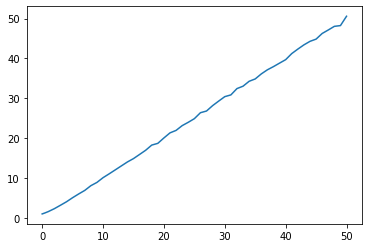

In [63]:
plt.plot(m0_betaList,m0_avgNumbs)
plt.xscale("linear")
plt.show()

In [64]:
np.array(m0_avgNumbs[0:-1])<np.array(m0_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [65]:
print(m0_avgNumbs[0],m0_avgNumbs[-1])

1.0004968602606776 50.57677136660008


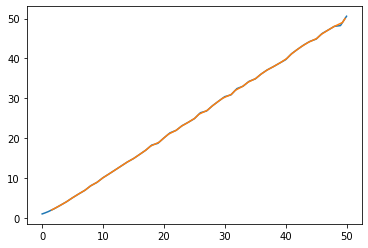

In [66]:
zVals =[ linear_interpolate(m0_betaList,m0_avgNumbs,cnum) for cnum in list(range(2,50+1))]
plt.plot(m0_betaList,m0_avgNumbs)
plt.plot(zVals,list(range(2,50+1)))
plt.xscale("linear")
plt.show()

In [67]:
print(zVals)

[1.5753205402226858, 2.800748029328425, 3.945059120052871, 4.9336260141670785, 5.991069511811084, 7.087130692474755, 7.93005323639134, 9.081835748080916, 9.926704872339473, 10.95215397651027, 11.963330039530343, 12.966569221554062, 13.972713985539121, 15.122811803620651, 16.08253342555993, 17.029096194367973, 17.79878705002129, 19.221562310527283, 19.959786566110182, 20.743019713476436, 22.043563812550342, 22.880641927561086, 24.02306585749125, 25.07677940235576, 25.744901892175005, 27.142942427748608, 27.88370500861769, 28.73792243653907, 29.629790621174166, 31.096409294421296, 31.72705683500133, 32.94505605613408, 33.7858817214735, 35.11619155874078, 35.907784580878804, 36.8590419011801, 38.05984256705183, 39.2051031056547, 40.205447227989985, 40.86130382020013, 41.700416203277285, 42.62463736013895, 43.67956558339467, 45.11276317950482, 45.818694051446414, 46.84936298118584, 47.952794688329256, 49.3274369379264, 49.75398137951137]


### simulations

In [16]:
### expected mean chromosome numbers simulated ###
print(list(range(2,50+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [54]:
m0_betaList =[1.5753205402226858, 2.800748029328425, 3.945059120052871, 4.9336260141670785, 5.991069511811084, 7.087130692474755, 7.93005323639134, 9.081835748080916, 9.926704872339473, 10.95215397651027, 11.963330039530343, 12.966569221554062, 13.972713985539121, 15.122811803620651, 16.08253342555993, 17.029096194367973, 17.79878705002129, 19.221562310527283, 19.959786566110182, 20.743019713476436, 22.043563812550342, 22.880641927561086, 24.02306585749125, 25.07677940235576, 25.744901892175005, 27.142942427748608, 27.88370500861769, 28.73792243653907, 29.629790621174166, 31.096409294421296, 31.72705683500133, 32.94505605613408, 33.7858817214735, 35.11619155874078, 35.907784580878804, 36.8590419011801, 38.05984256705183, 39.2051031056547, 40.205447227989985, 40.86130382020013, 41.700416203277285, 42.62463736013895, 43.67956558339467, 45.11276317950482, 45.818694051446414, 46.84936298118584, 47.952794688329256, 49.3274369379264, 49.75398137951137]
print(m0_betaList)

[1.5753205402226858, 2.800748029328425, 3.945059120052871, 4.9336260141670785, 5.991069511811084, 7.087130692474755, 7.93005323639134, 9.081835748080916, 9.926704872339473, 10.95215397651027, 11.963330039530343, 12.966569221554062, 13.972713985539121, 15.122811803620651, 16.08253342555993, 17.029096194367973, 17.79878705002129, 19.221562310527283, 19.959786566110182, 20.743019713476436, 22.043563812550342, 22.880641927561086, 24.02306585749125, 25.07677940235576, 25.744901892175005, 27.142942427748608, 27.88370500861769, 28.73792243653907, 29.629790621174166, 31.096409294421296, 31.72705683500133, 32.94505605613408, 33.7858817214735, 35.11619155874078, 35.907784580878804, 36.8590419011801, 38.05984256705183, 39.2051031056547, 40.205447227989985, 40.86130382020013, 41.700416203277285, 42.62463736013895, 43.67956558339467, 45.11276317950482, 45.818694051446414, 46.84936298118584, 47.952794688329256, 49.3274369379264, 49.75398137951137]


In [69]:
# burnInSteps = 20_000;

# nsamples,jumpsize, alpha =(120_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m0_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m0_resListByBeta = p.map(parallel_simulate_eb_ef,jobs)

# m0_chrsByBeta = np.array([x[0][burnInSteps:] for x in m0_resListByBeta])
# m0_timesByBeta = np.array([x[1][burnInSteps:] for x in m0_resListByBeta])

In [70]:
# np.save("./simulation_data/m0_chrsByBeta.npy",m0_chrsByBeta)
# np.save("./simulation_data/m0_timesByBeta.npy",m0_timesByBeta)

In [ ]:
m0_chrsByBeta = np.load("./simulation_data/m0_chrsByBeta.npy")
m0_timesByBeta = np.load("./simulation_data/m0_timesByBeta.npy")

In [71]:
m0_meanListByBeta = []
for ii,beta in enumerate( m0_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m0_chrsByBeta[ii],m0_timesByBeta[ii])
    m0_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

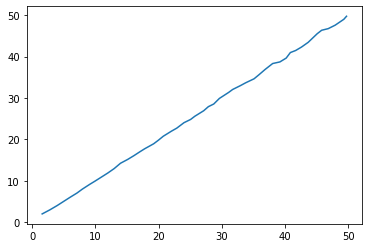

In [72]:
plt.plot(m0_betaList,m0_meanListByBeta)
plt.xscale("linear")
plt.show()

In [73]:
print(m0_meanListByBeta)

[1.9776186564634008, 2.9680007042949663, 3.993195003812598, 4.960550233214355, 5.9943989275689695, 7.02574324351031, 7.966440927573958, 9.105796794271434, 9.892177331532277, 10.882018299989804, 11.863250421656437, 12.927686405045456, 14.223052282151228, 15.157654433488018, 16.045973631768067, 16.984647124669223, 17.722900241039596, 18.929829179401857, 19.778135627905776, 20.750842133782406, 21.984739637427143, 22.709731618454576, 24.027769639663852, 24.816985402867694, 25.59124619355448, 26.917261241112868, 27.902438545084184, 28.547923777313322, 29.896576637281438, 31.34845629722787, 32.05612861597673, 32.98172723788601, 33.67131942551071, 34.63938431402761, 35.63915197457882, 36.888886066477575, 38.32882076019522, 38.71627813362677, 39.65022655586428, 40.98158853842812, 41.47964568828469, 42.31066210436064, 43.448148570876704, 45.53713060340751, 46.37372617652043, 46.75991647276519, 47.59893896970082, 49.023316816115326, 49.759622665006596]


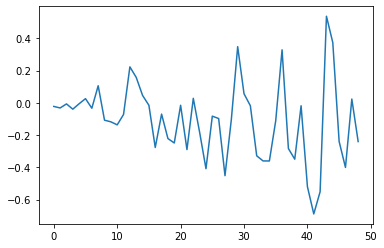

In [74]:
plt.plot(np.array(m0_meanListByBeta) - list(range(2,50+1)))

## EB/EF With Size Limit

### finding beta list for uniform sampling

In [44]:
rc, rt = simulate_eb_ef_softLimit(10000,1,150,1)
rc = rc[5000:]
rt = rt[5000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

67.16815246405123

In [45]:
m0_lim_betaList =[.01,0.1]+list(range(1,150,5))
print(m0_lim_betaList)

[0.01, 0.1, 1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146]


In [53]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m0_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m0_lim_resListByBeta = p.map(parallel_simulate_eb_ef_softLimit,jobs)

m0_lim_chrsByBeta = np.array([x[0][burnInSteps:] for x in m0_lim_resListByBeta])
m0_lim_timesByBeta = np.array([x[1][burnInSteps:] for x in m0_lim_resListByBeta])

In [54]:
m0_lim_avgNumbs = []
for ii,beta in enumerate( m0_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m0_lim_chrsByBeta[ii],m0_lim_timesByBeta[ii])
    m0_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

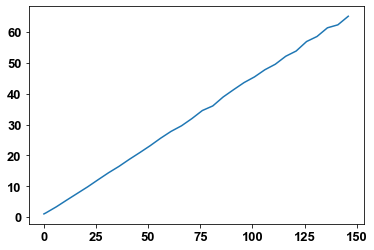

In [55]:
plt.plot(m0_lim_betaList,m0_lim_avgNumbs)
plt.xscale("linear")
plt.show()

In [56]:
np.array(m0_lim_avgNumbs[0:-1])<np.array(m0_lim_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [57]:
print(m0_lim_avgNumbs[0],m0_lim_avgNumbs[-1])

1.0033422539514563 65.16011677347356


In [58]:
print(m0_lim_avgNumbs)

[1.0033422539514563, 1.0337168388234785, 1.3511785360682125, 3.3237277521495927, 5.512681021401792, 7.655552184368703, 9.796557483998225, 12.101308213650107, 14.359929806637751, 16.426948181860695, 18.730040831442086, 20.905896201825367, 23.155108976547563, 25.58172680457985, 27.793928624302435, 29.601609374791312, 31.947874271704123, 34.560526270565724, 36.04830555521853, 38.963908151494095, 41.33138961124427, 43.62482337210184, 45.47006153624239, 47.79410388905385, 49.58786669848797, 52.17097256953772, 53.87054582076186, 56.95565121846901, 58.58848541334807, 61.40780850864883, 62.3708566622371, 65.16011677347356]


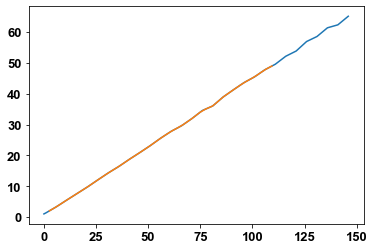

In [59]:
zVals =[ linear_interpolate(m0_lim_betaList,m0_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m0_lim_betaList,m0_lim_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))
plt.xscale("linear")
plt.show()

In [60]:
print(zVals)

[2.644626807387653, 5.179417807397722, 7.544738888102072, 9.828935663900818, 12.13707017719976, 14.470388244291229, 16.80440673288128, 19.139758261840687, 21.441354705704995, 23.610786712243602, 25.78021871878221, 27.989469571042946, 30.20320914367589, 32.5482934284346, 34.96723660762173, 37.244091978330665, 39.415085837786904, 41.620351821707615, 43.91829867426852, 46.209192743417205, 48.43219274421418, 50.65519274501115, 52.74088192564205, 54.80136295493311, 56.94537756838253, 59.20556918174402, 61.569988300317505, 64.33596343096366, 66.84898901597361, 68.98003568788988, 71.09975635545528, 73.01352060809154, 74.9272848607278, 77.4769453169824, 80.83765886608037, 82.6320716101659, 84.34698296550187, 86.0762241418138, 88.18817309896745, 90.30012205612111, 92.45766230568115, 94.63779939328137, 97.01660759892452, 99.72628491709814, 102.14012221661221, 104.29154600368362, 106.57392234319738, 109.3613588836937]


In [ ]:
###

### simulations

In [61]:
### expected mean chromosome numbers simulated ###
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [64]:
m0_lim_betaList =[2.644626807387653, 5.179417807397722, 7.544738888102072, 9.828935663900818, 12.13707017719976, 14.470388244291229, 16.80440673288128, 19.139758261840687, 21.441354705704995, 23.610786712243602, 25.78021871878221, 27.989469571042946, 30.20320914367589, 32.5482934284346, 34.96723660762173, 37.244091978330665, 39.415085837786904, 41.620351821707615, 43.91829867426852, 46.209192743417205, 48.43219274421418, 50.65519274501115, 52.74088192564205, 54.80136295493311, 56.94537756838253, 59.20556918174402, 61.569988300317505, 64.33596343096366, 66.84898901597361, 68.98003568788988, 71.09975635545528, 73.01352060809154, 74.9272848607278, 77.4769453169824, 80.83765886608037, 82.6320716101659, 84.34698296550187, 86.0762241418138, 88.18817309896745, 90.30012205612111, 92.45766230568115, 94.63779939328137, 97.01660759892452, 99.72628491709814, 102.14012221661221, 104.29154600368362, 106.57392234319738, 109.3613588836937]
print(m0_lim_betaList)

[2.644626807387653, 5.179417807397722, 7.544738888102072, 9.828935663900818, 12.13707017719976, 14.470388244291229, 16.80440673288128, 19.139758261840687, 21.441354705704995, 23.610786712243602, 25.78021871878221, 27.989469571042946, 30.20320914367589, 32.5482934284346, 34.96723660762173, 37.244091978330665, 39.415085837786904, 41.620351821707615, 43.91829867426852, 46.209192743417205, 48.43219274421418, 50.65519274501115, 52.74088192564205, 54.80136295493311, 56.94537756838253, 59.20556918174402, 61.569988300317505, 64.33596343096366, 66.84898901597361, 68.98003568788988, 71.09975635545528, 73.01352060809154, 74.9272848607278, 77.4769453169824, 80.83765886608037, 82.6320716101659, 84.34698296550187, 86.0762241418138, 88.18817309896745, 90.30012205612111, 92.45766230568115, 94.63779939328137, 97.01660759892452, 99.72628491709814, 102.14012221661221, 104.29154600368362, 106.57392234319738, 109.3613588836937]


In [65]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m0_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m0_lim_resListByBeta = p.map(parallel_simulate_eb_ef_softLimit,jobs)

m0_lim_chrsByBeta = np.array([x[0][burnInSteps:] for x in m0_lim_resListByBeta])
m0_lim_timesByBeta = np.array([x[1][burnInSteps:] for x in m0_lim_resListByBeta])

In [66]:
np.save("./simulation_data/m0_soft_lim_chrsByBeta.npy",m0_lim_chrsByBeta)
np.save("./simulation_data/m0_soft_lim_timesByBeta.npy",m0_lim_timesByBeta)

In [6]:
# m0_lim_chrsByBeta = np.load("./simulation_data/m0_soft_lim_chrsByBeta.npy")
# m0_lim_timesByBeta = np.load("./simulation_data/m0_soft_lim_timesByBeta.npy")

In [67]:
m0_lim_meanListByBeta = []
for ii,beta in enumerate( m0_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m0_lim_chrsByBeta[ii],m0_lim_timesByBeta[ii])
    m0_lim_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

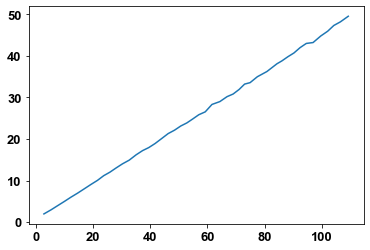

In [68]:
plt.plot(m0_lim_betaList,m0_lim_meanListByBeta)
plt.xscale("linear")
plt.show()

In [69]:
print(m0_lim_meanListByBeta)

[1.9757433827398003, 2.9735125423727595, 3.999726543434083, 4.981557563359865, 6.011856639434175, 6.9795715079899265, 8.01980564035794, 9.067128135469318, 10.053175059345518, 11.174927536641647, 12.015262287571938, 13.047744237589784, 14.027923464200887, 14.90802517597023, 16.190969590352342, 17.20689815333021, 17.936611568785608, 18.907753017565703, 20.101242420512644, 21.300676768673213, 22.11750607892492, 23.138109895252587, 23.858771944612936, 24.807007552538234, 25.83441772583191, 26.5275598437795, 28.311338670143527, 28.99792113370476, 30.18328764776588, 30.815686144156142, 31.922978496803463, 33.20458773369621, 33.550709042945634, 34.975377060064524, 36.2315630060985, 37.183114277952704, 38.091610425997466, 38.783112145265, 39.79007569028349, 40.68968899286878, 41.974500292739826, 42.98516972698296, 43.19918970991243, 44.78495462514074, 45.925046227648366, 47.307245742885705, 48.1680803776429, 49.52767438389966]


In [70]:
np.array(m0_lim_meanListByBeta[1:]) > np.array(m0_lim_meanListByBeta[0:-1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

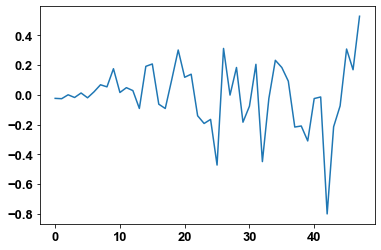

In [71]:
plt.plot(np.array(m0_lim_meanListByBeta) - list(range(2,49+1)))

# M1: Proportional Break, Equal Fuse

## M1 with no size limit

### finding beta list to get appx uniform sampling across chromosome number

In [82]:
rc,rt = simulate_pb_ef(1000,1,20,1)

In [93]:
m1_betaList = [0.01,0.05,0.1] +list(range(1,10,1))+list(range(10,100,10)) + list(range(100,1000,100)) + list(range(1000,10_000,1000))
print(m1_betaList)

[0.01, 0.05, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]


In [94]:
burnInSteps = 5_000;

nsamples,jumpsize, alpha =(20_000, 11, 1)

jobs1 = [(nsamples,jumpsize,beta,alpha) for beta in m1_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m1_resListByBeta = p.map(parallel_simulate_pb_ef,jobs1)

m1_chrsByBeta = [x[0][burnInSteps:-1] for x in m1_resListByBeta]
m1_timesByBeta = [x[1][burnInSteps:-1] for x in m1_resListByBeta]

In [95]:
m1_avgNumbs = []
for ii,beta in enumerate( m1_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_chrsByBeta[ii],m1_timesByBeta[ii])
    m1_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

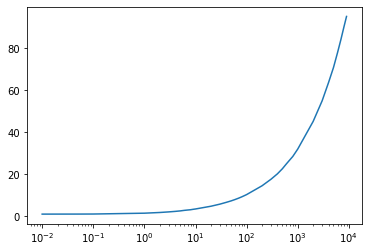

In [96]:
plt.plot(m1_betaList,m1_avgNumbs)
plt.xscale("log")
plt.show()

In [97]:
np.array(m1_avgNumbs[0:-1])<np.array(m1_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [98]:
print(m1_avgNumbs)

[1.0050972500311288, 1.0241986736308641, 1.0490519739774145, 1.4459292109531416, 1.7794817601143222, 2.0623769375119885, 2.3038986691662906, 2.5259761023923635, 2.7818539154168733, 2.952890186703309, 3.08563908192758, 3.291232857284889, 3.4492104239565253, 4.75123777564561, 5.7525780331981196, 6.606749127221111, 7.317003191816265, 7.989049179842825, 8.609715156188209, 9.200808057078396, 9.7733123619973, 10.295576353906524, 14.475100947716529, 17.60228625980401, 20.16165056073397, 22.5700985128567, 24.909033092903822, 26.798953332283713, 28.42621908193549, 30.28137082063051, 31.94652266731252, 45.0728194765252, 54.88636709307768, 63.54864815446755, 70.71108890317795, 77.77907554651192, 84.10386923328396, 89.98423484035146, 94.9957278700836]


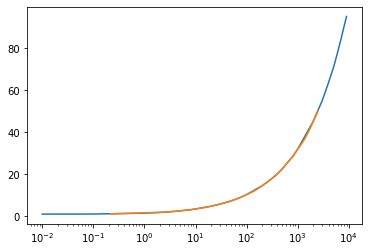

In [102]:
zVals =[ linear_interpolate(m1_betaList,m1_avgNumbs,cnum) for cnum in [1.1]+list(range(2,50+1))]
plt.plot(m1_betaList,m1_avgNumbs)
plt.plot(zVals,[1.1]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

In [103]:
print(zVals)

[0.21553502984886844, 2.7795051224068583, 7.354879136410906, 14.230245818791367, 22.484292651555013, 32.89663240225758, 45.53676342567702, 60.17643661122938, 76.6027665570678, 94.34047993954178, 116.85415722009981, 140.78032340371382, 164.70648958732784, 188.63265577094182, 216.7850319024774, 248.7626699444159, 280.7403079863544, 315.5395517571093, 354.6117541644275, 393.6839565717458, 434.80870070400044, 476.3292159851645, 518.3802270833346, 561.1347362744319, 604.8132669940624, 657.725552875932, 712.354876132513, 773.8076536038016, 830.9290558878018, 884.8330023489918, 943.1569757918135, 1004.074060907258, 1080.257009878681, 1156.4399588501037, 1232.6229078215265, 1308.8058567929495, 1384.9888057643723, 1461.1717547357953, 1537.354703707218, 1613.5376526786408, 1689.7206016500636, 1765.9035506214866, 1842.0864995929096, 1918.2694485643324, 1994.4523975357552, 2094.479647901329, 2196.379596734644, 2298.2795455679593, 2400.1794944012745, 2502.0794432345892]


In [104]:
m1_betaList = [0.21553502984886844, 2.7795051224068583, 7.354879136410906, 14.230245818791367, 22.484292651555013, 32.89663240225758, 45.53676342567702, 60.17643661122938, 76.6027665570678, 94.34047993954178, 116.85415722009981, 140.78032340371382, 164.70648958732784, 188.63265577094182, 216.7850319024774, 248.7626699444159, 280.7403079863544, 315.5395517571093, 354.6117541644275, 393.6839565717458, 434.80870070400044, 476.3292159851645, 518.3802270833346, 561.1347362744319, 604.8132669940624, 657.725552875932, 712.354876132513, 773.8076536038016, 830.9290558878018, 884.8330023489918, 943.1569757918135, 1004.074060907258, 1080.257009878681, 1156.4399588501037, 1232.6229078215265, 1308.8058567929495, 1384.9888057643723, 1461.1717547357953, 1537.354703707218, 1613.5376526786408, 1689.7206016500636, 1765.9035506214866, 1842.0864995929096, 1918.2694485643324, 1994.4523975357552, 2094.479647901329, 2196.379596734644, 2298.2795455679593, 2400.1794944012745, 2502.0794432345892]
print(m1_betaList)

[0.21553502984886844, 2.7795051224068583, 7.354879136410906, 14.230245818791367, 22.484292651555013, 32.89663240225758, 45.53676342567702, 60.17643661122938, 76.6027665570678, 94.34047993954178, 116.85415722009981, 140.78032340371382, 164.70648958732784, 188.63265577094182, 216.7850319024774, 248.7626699444159, 280.7403079863544, 315.5395517571093, 354.6117541644275, 393.6839565717458, 434.80870070400044, 476.3292159851645, 518.3802270833346, 561.1347362744319, 604.8132669940624, 657.725552875932, 712.354876132513, 773.8076536038016, 830.9290558878018, 884.8330023489918, 943.1569757918135, 1004.074060907258, 1080.257009878681, 1156.4399588501037, 1232.6229078215265, 1308.8058567929495, 1384.9888057643723, 1461.1717547357953, 1537.354703707218, 1613.5376526786408, 1689.7206016500636, 1765.9035506214866, 1842.0864995929096, 1918.2694485643324, 1994.4523975357552, 2094.479647901329, 2196.379596734644, 2298.2795455679593, 2400.1794944012745, 2502.0794432345892]


In [105]:
burnInSteps = 5_000;

nsamples,jumpsize, alpha =(20_000, 11, 1)

jobs1 = [(nsamples,jumpsize,beta,alpha) for beta in m1_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m1_resListByBeta = p.map(parallel_simulate_pb_ef,jobs1)

m1_chrsByBeta = [x[0][burnInSteps:-1] for x in m1_resListByBeta]
m1_timesByBeta = [x[1][burnInSteps:-1] for x in m1_resListByBeta]

In [106]:
m1_avgNumbs = []
for ii,beta in enumerate( m1_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_chrsByBeta[ii],m1_timesByBeta[ii])
    m1_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

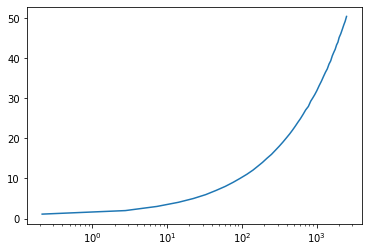

In [107]:
plt.plot(m1_betaList,m1_avgNumbs)
plt.xscale("log")
plt.show()

In [108]:
np.array(m1_avgNumbs[0:-1])<np.array(m1_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [109]:
print(m1_avgNumbs)

[1.1043343781984802, 1.9824046003788278, 3.0184763231464498, 4.04924070622362, 4.986749613970741, 5.959477838659452, 7.026368124493732, 8.018914223584623, 9.030135574330968, 9.990620949901915, 11.03464534390466, 12.06625412241875, 13.090192395188122, 13.986160712274863, 15.029362495497823, 15.989257833246064, 17.01526406241367, 18.012764576471366, 19.078792898866514, 20.09844305693383, 21.07746835810598, 22.065465911686896, 23.040712479445666, 24.000229394724418, 24.863353737564125, 25.959450690156146, 27.07153341601928, 27.935466306842383, 29.235455614909636, 30.038814607731368, 30.908116666613214, 31.863423151634137, 33.147716733783845, 34.23903567280577, 35.4039365658087, 36.4495330808545, 37.29520070753096, 38.503358050432105, 39.28997861645903, 40.528337260545726, 41.411138561171796, 42.178536520165906, 43.26461422127447, 43.9253467798823, 45.12535885796888, 46.028983328327406, 47.14095515553354, 48.233199348009975, 49.16935098602599, 50.36230510094536]


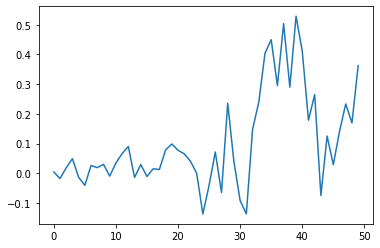

In [111]:
plt.plot(np.array(m1_avgNumbs) - np.array([1.1]+list(range(2,50+1))))

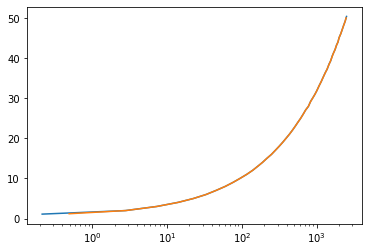

In [112]:
zVals =[ linear_interpolate(m1_betaList,m1_avgNumbs,cnum) for cnum in [1.2]+list(range(2,50+1))]
plt.plot(m1_betaList,m1_avgNumbs)
plt.plot(zVals,[1.2]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

In [113]:
print(zVals)

[0.49487919502963584, 2.857207787602349, 7.273286243813867, 13.90180227093023, 22.62612828216886, 33.376724343760394, 45.224363403980334, 59.897459088582345, 76.11324278791234, 94.54273278757812, 116.1070538991199, 139.24368744601693, 162.5989814560684, 189.00612985783124, 215.9926406022427, 249.0974721224906, 280.2645714371622, 315.0942411011272, 351.72382705395944, 389.9116950605973, 431.5545800989048, 473.57801647385065, 516.6247726356064, 561.1245148195546, 611.4096415990624, 659.7174742535182, 708.8409090359269, 776.6432577313532, 820.5831593363325, 882.2286118389475, 949.0161057447426, 1012.1756563791579, 1071.4946080816999, 1139.7533223293149, 1206.206000627501, 1276.052538216515, 1358.3953076467446, 1429.4314347387817, 1509.270736551259, 1581.0347176427722, 1654.240649362134, 1748.1794500476942, 1823.5251280668306, 1923.0088195778706, 1986.493971404756, 2091.2713210640945, 2183.462611982658, 2276.5234201576686, 2381.7456679674583, 2471.132007128988]


In [114]:
m1_betaList = [0.49487919502963584, 2.857207787602349, 7.273286243813867, 13.90180227093023, 22.62612828216886, 33.376724343760394, 45.224363403980334, 59.897459088582345, 76.11324278791234, 94.54273278757812, 116.1070538991199, 139.24368744601693, 162.5989814560684, 189.00612985783124, 215.9926406022427, 249.0974721224906, 280.2645714371622, 315.0942411011272, 351.72382705395944, 389.9116950605973, 431.5545800989048, 473.57801647385065, 516.6247726356064, 561.1245148195546, 611.4096415990624, 659.7174742535182, 708.8409090359269, 776.6432577313532, 820.5831593363325, 882.2286118389475, 949.0161057447426, 1012.1756563791579, 1071.4946080816999, 1139.7533223293149, 1206.206000627501, 1276.052538216515, 1358.3953076467446, 1429.4314347387817, 1509.270736551259, 1581.0347176427722, 1654.240649362134, 1748.1794500476942, 1823.5251280668306, 1923.0088195778706, 1986.493971404756, 2091.2713210640945, 2183.462611982658, 2276.5234201576686, 2381.7456679674583, 2471.132007128988]
print(m1_betaList)

[0.49487919502963584, 2.857207787602349, 7.273286243813867, 13.90180227093023, 22.62612828216886, 33.376724343760394, 45.224363403980334, 59.897459088582345, 76.11324278791234, 94.54273278757812, 116.1070538991199, 139.24368744601693, 162.5989814560684, 189.00612985783124, 215.9926406022427, 249.0974721224906, 280.2645714371622, 315.0942411011272, 351.72382705395944, 389.9116950605973, 431.5545800989048, 473.57801647385065, 516.6247726356064, 561.1245148195546, 611.4096415990624, 659.7174742535182, 708.8409090359269, 776.6432577313532, 820.5831593363325, 882.2286118389475, 949.0161057447426, 1012.1756563791579, 1071.4946080816999, 1139.7533223293149, 1206.206000627501, 1276.052538216515, 1358.3953076467446, 1429.4314347387817, 1509.270736551259, 1581.0347176427722, 1654.240649362134, 1748.1794500476942, 1823.5251280668306, 1923.0088195778706, 1986.493971404756, 2091.2713210640945, 2183.462611982658, 2276.5234201576686, 2381.7456679674583, 2471.132007128988]


In [115]:
burnInSteps = 5_000;

nsamples,jumpsize, alpha =(20_000, 11, 1)

jobs1 = [(nsamples,jumpsize,beta,alpha) for beta in m1_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m1_resListByBeta = p.map(parallel_simulate_pb_ef,jobs1)

m1_chrsByBeta = [x[0][burnInSteps:-1] for x in m1_resListByBeta]
m1_timesByBeta = [x[1][burnInSteps:-1] for x in m1_resListByBeta]

In [116]:
m1_avgNumbs = []
for ii,beta in enumerate( m1_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_chrsByBeta[ii],m1_timesByBeta[ii])
    m1_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

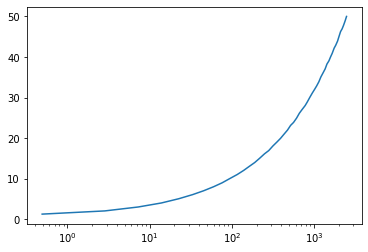

In [117]:
plt.plot(m1_betaList,m1_avgNumbs)
plt.xscale("log")
plt.show()

In [118]:
np.array(m1_avgNumbs[0:-1])<np.array(m1_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [119]:
print(m1_avgNumbs)

[1.23534191931582, 2.0260412836538313, 2.9953157826923653, 3.9854073894091964, 5.032704349120271, 6.052145996194836, 6.989390662903876, 7.990128755888411, 8.961824512664519, 10.020978497862133, 11.006624818696034, 12.028734980354544, 13.014245468098927, 13.949571075522552, 14.96806266780475, 16.116042562095554, 16.91003854006966, 18.052482455756188, 19.0032656489518, 19.928171981352474, 21.00087798707539, 21.96403484712582, 23.126877948638583, 23.856230750020053, 24.938247612176287, 26.114529513953006, 26.978448595169148, 28.02494510495434, 28.838733663274276, 30.00327162124749, 31.120455602172385, 32.03195114283729, 32.870818101058234, 33.893132273963445, 35.09274618043254, 36.021363706621585, 37.06347900218905, 38.27253950354109, 39.044551990668225, 40.0257149062186, 40.899139451627256, 42.19640918804498, 42.87501103796438, 43.93139572665672, 44.859620995345146, 46.27160534359857, 46.94032729617434, 47.84989072442753, 48.9769718840775, 50.00872474718196]


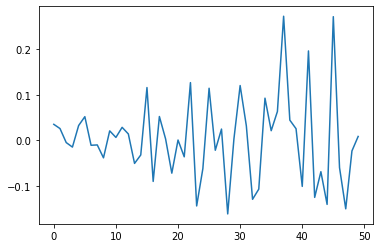

In [120]:
plt.plot(np.array(m1_avgNumbs) - np.array([1.2]+list(range(2,50+1))))

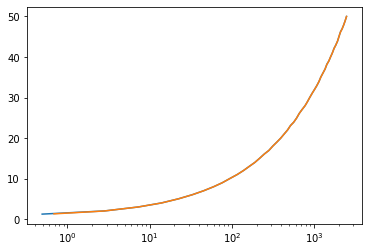

In [122]:
zVals =[ linear_interpolate(m1_betaList,m1_avgNumbs,cnum) for cnum in [1.3]+list(range(2,50+1))]
plt.plot(m1_betaList,m1_avgNumbs)
plt.plot(zVals,[1.3]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

In [123]:
print(zVals)

[0.6880545529850479, 2.7794056901967874, 7.3046463818935266, 14.023363487134224, 22.353690363711305, 32.82681494685798, 45.379920406809475, 60.062191679252386, 76.77750386034776, 94.17770275232215, 115.96211375715686, 138.59323827196548, 162.26138271927286, 190.3423222452326, 216.91363234328978, 245.75109864813243, 283.0072250491593, 313.4942092990906, 351.5980156493955, 392.7000880658668, 431.52049628222943, 474.90939399510097, 511.9279359684381, 567.8059772025249, 613.9457037560123, 655.01394818066, 710.2372212563256, 775.0270681993829, 829.1198809028828, 882.055426782301, 941.8150288108013, 1009.9616907218083, 1080.119931450515, 1145.6732658882127, 1201.068320863676, 1274.445653901388, 1353.3795125009037, 1413.4188772286357, 1504.6632983444708, 1579.1538841803633, 1661.5442337167547, 1733.9569309750461, 1835.2958054294768, 1927.7009485858705, 1996.9108999448956, 2071.1166443562583, 2189.567947654156, 2290.53734919694, 2383.7407183847704, 2470.376135021826]


In [124]:
m1_betaList = [0.6880545529850479, 2.7794056901967874, 7.3046463818935266, 14.023363487134224, 22.353690363711305, 32.82681494685798, 45.379920406809475, 60.062191679252386, 76.77750386034776, 94.17770275232215, 115.96211375715686, 138.59323827196548, 162.26138271927286, 190.3423222452326, 216.91363234328978, 245.75109864813243, 283.0072250491593, 313.4942092990906, 351.5980156493955, 392.7000880658668, 431.52049628222943, 474.90939399510097, 511.9279359684381, 567.8059772025249, 613.9457037560123, 655.01394818066, 710.2372212563256, 775.0270681993829, 829.1198809028828, 882.055426782301, 941.8150288108013, 1009.9616907218083, 1080.119931450515, 1145.6732658882127, 1201.068320863676, 1274.445653901388, 1353.3795125009037, 1413.4188772286357, 1504.6632983444708, 1579.1538841803633, 1661.5442337167547, 1733.9569309750461, 1835.2958054294768, 1927.7009485858705, 1996.9108999448956, 2071.1166443562583, 2189.567947654156, 2290.53734919694, 2383.7407183847704, 2470.376135021826]
print(m1_betaList)

[0.6880545529850479, 2.7794056901967874, 7.3046463818935266, 14.023363487134224, 22.353690363711305, 32.82681494685798, 45.379920406809475, 60.062191679252386, 76.77750386034776, 94.17770275232215, 115.96211375715686, 138.59323827196548, 162.26138271927286, 190.3423222452326, 216.91363234328978, 245.75109864813243, 283.0072250491593, 313.4942092990906, 351.5980156493955, 392.7000880658668, 431.52049628222943, 474.90939399510097, 511.9279359684381, 567.8059772025249, 613.9457037560123, 655.01394818066, 710.2372212563256, 775.0270681993829, 829.1198809028828, 882.055426782301, 941.8150288108013, 1009.9616907218083, 1080.119931450515, 1145.6732658882127, 1201.068320863676, 1274.445653901388, 1353.3795125009037, 1413.4188772286357, 1504.6632983444708, 1579.1538841803633, 1661.5442337167547, 1733.9569309750461, 1835.2958054294768, 1927.7009485858705, 1996.9108999448956, 2071.1166443562583, 2189.567947654156, 2290.53734919694, 2383.7407183847704, 2470.376135021826]


In [125]:
burnInSteps = 5_000;

nsamples,jumpsize, alpha =(20_000, 11, 1)

jobs1 = [(nsamples,jumpsize,beta,alpha) for beta in m1_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m1_resListByBeta = p.map(parallel_simulate_pb_ef,jobs1)

m1_chrsByBeta = [x[0][burnInSteps:-1] for x in m1_resListByBeta]
m1_timesByBeta = [x[1][burnInSteps:-1] for x in m1_resListByBeta]

In [126]:
m1_avgNumbs = []
for ii,beta in enumerate( m1_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_chrsByBeta[ii],m1_timesByBeta[ii])
    m1_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

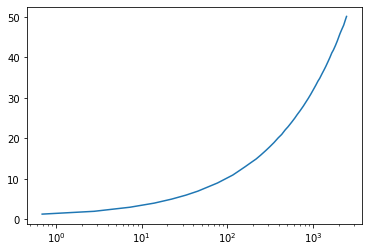

In [127]:
plt.plot(m1_betaList,m1_avgNumbs)
plt.xscale("log")
plt.show()

In [128]:
np.array(m1_avgNumbs[0:-1])<np.array(m1_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [129]:
print(m1_avgNumbs)

[1.3006397304210582, 1.9934647699550543, 3.0036499578873035, 4.019089742420586, 5.004389099316336, 5.986936495682742, 6.981210746111377, 8.05364294305655, 8.990400840894772, 9.964142812207406, 10.956655222911918, 12.055633631979438, 13.039362914120657, 14.078792555718621, 14.912755055882881, 15.882745411562862, 17.051596224117, 17.942567136609338, 18.991062770358713, 20.129487177017268, 20.976952227557597, 22.120322569010032, 22.877286222030566, 24.075474048722715, 25.01985244557318, 25.882057953043745, 26.8750955125572, 28.02695653608417, 29.002853418321052, 29.881967074019997, 30.885392134964967, 32.02461857143798, 33.131671534782, 34.1650925893359, 34.85170199007536, 35.93691288302055, 36.98843288668277, 37.77929786266121, 39.02129273242683, 40.00012707257216, 41.12888348458283, 41.82735769027151, 42.98446037901337, 44.093908311170345, 44.975926050329974, 45.88946619745081, 47.08042726834985, 48.005240966403605, 49.1575358356907, 50.14131646336085]


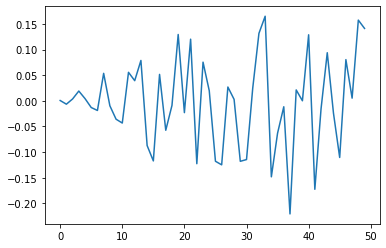

In [130]:
plt.plot(np.array(m1_avgNumbs) - np.array([1.3]+list(range(2,50+1))))

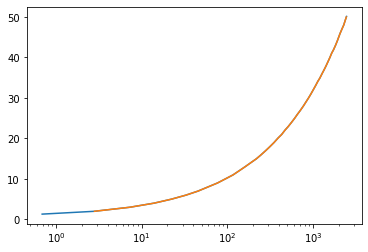

In [131]:
zVals =[ linear_interpolate(m1_betaList,m1_avgNumbs,cnum) for cnum in list(range(2,50+1))]
plt.plot(m1_betaList,m1_avgNumbs)
plt.plot(zVals,list(range(2,50+1)))
plt.xscale("log")
plt.show()

In [132]:
print(zVals)

[2.808681004547339, 7.288295975896768, 13.897055082746881, 22.316582218107683, 32.99174685302006, 45.63715710987134, 59.327786050577714, 76.9490352131573, 94.96472335571887, 116.85470731427627, 137.4475818676636, 161.31432629410799, 188.21368466969747, 219.50739332401787, 249.4884890156581, 281.3626392501229, 315.58140035105106, 351.9206885100354, 388.0250377984629, 432.3951187949515, 470.34336368099093, 517.6507495312305, 564.2862101737827, 612.9757679620348, 661.5727593794625, 717.2628454059655, 773.5108177044572, 828.9617192921482, 889.0849509165514, 948.6706838244477, 1008.4890480488466, 1071.7753955157123, 1135.2008938824058, 1211.0955999241892, 1279.1813789030655, 1354.2576423415137, 1429.6329850729826, 1503.0990060180243, 1579.1442137898225, 1652.136751968472, 1749.07691775005, 1836.5900896047367, 1919.879390957294, 1998.8663973161017, 2082.1101799892413, 2181.568765321909, 2289.9651504477306, 2370.9984324946336, 2457.9312765476993]


### simulation set using the interpolated beta values obtained above

From interpolation in previous section, the following beta values approximate simulations with mean chr number = 2, 3, 4, ....

In [8]:
#chr num expected in each sim:
print(list(range(2,50+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [9]:
m1_betaList =[2.808681004547339, 7.288295975896768, 13.897055082746881, 22.316582218107683, 32.99174685302006, 45.63715710987134, 59.327786050577714, 76.9490352131573, 94.96472335571887, 116.85470731427627, 137.4475818676636, 161.31432629410799, 188.21368466969747, 219.50739332401787, 249.4884890156581, 281.3626392501229, 315.58140035105106, 351.9206885100354, 388.0250377984629, 432.3951187949515, 470.34336368099093, 517.6507495312305, 564.2862101737827, 612.9757679620348, 661.5727593794625, 717.2628454059655, 773.5108177044572, 828.9617192921482, 889.0849509165514, 948.6706838244477, 1008.4890480488466, 1071.7753955157123, 1135.2008938824058, 1211.0955999241892, 1279.1813789030655, 1354.2576423415137, 1429.6329850729826, 1503.0990060180243, 1579.1442137898225, 1652.136751968472, 1749.07691775005, 1836.5900896047367, 1919.879390957294, 1998.8663973161017, 2082.1101799892413, 2181.568765321909, 2289.9651504477306, 2370.9984324946336, 2457.9312765476993]
print(m1_betaList)

[2.808681004547339, 7.288295975896768, 13.897055082746881, 22.316582218107683, 32.99174685302006, 45.63715710987134, 59.327786050577714, 76.9490352131573, 94.96472335571887, 116.85470731427627, 137.4475818676636, 161.31432629410799, 188.21368466969747, 219.50739332401787, 249.4884890156581, 281.3626392501229, 315.58140035105106, 351.9206885100354, 388.0250377984629, 432.3951187949515, 470.34336368099093, 517.6507495312305, 564.2862101737827, 612.9757679620348, 661.5727593794625, 717.2628454059655, 773.5108177044572, 828.9617192921482, 889.0849509165514, 948.6706838244477, 1008.4890480488466, 1071.7753955157123, 1135.2008938824058, 1211.0955999241892, 1279.1813789030655, 1354.2576423415137, 1429.6329850729826, 1503.0990060180243, 1579.1442137898225, 1652.136751968472, 1749.07691775005, 1836.5900896047367, 1919.879390957294, 1998.8663973161017, 2082.1101799892413, 2181.568765321909, 2289.9651504477306, 2370.9984324946336, 2457.9312765476993]


In [10]:
# burnInSteps = 20_000;

# nsamples,jumpsize, alpha =(120_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m1_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m1_resListByBeta = p.map(parallel_simulate_pb_ef,jobs)

# m1_chrsByBeta = [x[0][burnInSteps:-1] for x in m1_resListByBeta]
# m1_timesByBeta = [x[1][burnInSteps:-1] for x in m1_resListByBeta]

# np.save("./simulation_data/m1_chrsByBeta.npy",m1_chrsByBeta)
# np.save("./simulation_data/m1_timesByBeta.npy",m1_timesByBeta)


In [ ]:
m1_chrsByBeta = np.load("./simulation_data/m1_chrsByBeta.npy")
m1_timesByBeta = np.load("./simulation_data/m1_timesByBeta.npy")

In [11]:
m1_meanListByBeta = []
for ii,beta in enumerate( m1_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_chrsByBeta[ii],m1_timesByBeta[ii])
    m1_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

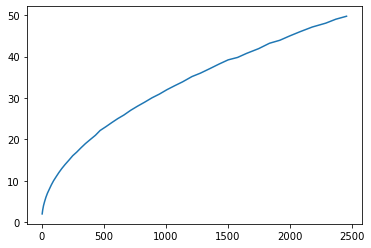

In [12]:
plt.plot(m1_betaList,m1_meanListByBeta)
plt.xscale("linear")
plt.show()

In [13]:
print(m1_meanListByBeta)

[2.0019756195871325, 2.9937712322208667, 4.0339485925435286, 4.973157984993071, 6.015917143033644, 7.017802560545527, 7.899959291954609, 9.019556354138572, 10.020541051968129, 11.042893864787636, 11.979785477914444, 12.964192327823572, 13.953590677658092, 15.008610495640262, 16.058776259601352, 16.915064449181276, 17.94876516662371, 18.982069129566344, 19.88898431660141, 20.986382306550315, 22.144472375466606, 23.074396954309936, 24.04589570695803, 25.015378245971007, 25.8679258181526, 27.02629286254427, 28.03767730287782, 28.968524141502307, 30.037548556664646, 30.934544799605998, 31.979149205409144, 32.950582543902286, 33.881387927075934, 35.16015611340161, 35.983543266368244, 37.06388638715901, 38.178967664058106, 39.19301780399689, 39.78151233387648, 40.763262760290665, 41.90284592546043, 43.20316300803878, 43.923202492190015, 44.96062185267994, 45.980526706251055, 47.12229442717691, 48.05164657056882, 49.00261101780258, 49.72314321854666]


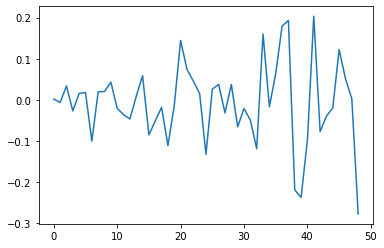

In [14]:
plt.plot(np.array(m1_meanListByBeta) - list(range(2,50+1)))

## M1 with size limit  

### finding beta list to get appx uniform sampling across chromosome number

In [53]:
rc, rt = simulate_pb_ef_softLimit(10000,1,5000,1)
rc = rc[5000:]
rt = rt[5000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

60.40214318655883

In [28]:
rc, rt = simulate_pb_ef_softLimit(10000,1,3000,1)
rc = rc[5000:]
rt = rt[5000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

52.66693781678966

In [63]:
tens = [10**x for x in [0,1,2,3]]
allVals = [[0.1,0.5]]+[ [x*power for x in [1,2,3,4,5,6,7,8,9]] for power in tens]
m1_lim_betaList =flatten(allVals)
m1_lim_betaList = m1_lim_betaList[0:-4]
print(m1_lim_betaList)

[1.e-01 5.e-01 1.e+00 2.e+00 3.e+00 4.e+00 5.e+00 6.e+00 7.e+00 8.e+00
 9.e+00 1.e+01 2.e+01 3.e+01 4.e+01 5.e+01 6.e+01 7.e+01 8.e+01 9.e+01
 1.e+02 2.e+02 3.e+02 4.e+02 5.e+02 6.e+02 7.e+02 8.e+02 9.e+02 1.e+03
 2.e+03 3.e+03 4.e+03 5.e+03]


In [64]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m1_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    m1_lim_resListByBeta = p.map(parallel_simulate_pb_ef_softLimit,jobs)

m1_lim_chrsByBeta = [x[0][burnInSteps:] for x in m1_lim_resListByBeta]
m1_lim_timesByBeta = [x[1][burnInSteps:] for x in m1_lim_resListByBeta]

In [65]:
m1_lim_avgNumbs = []
for ii,beta in enumerate( m1_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_lim_chrsByBeta[ii],m1_lim_timesByBeta[ii])
    m1_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

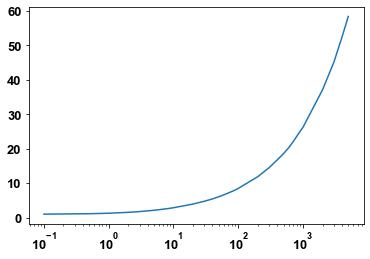

In [66]:
plt.plot(m1_lim_betaList,m1_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [67]:
np.array(m1_lim_avgNumbs[0:-1])<np.array(m1_lim_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [68]:
print(m1_lim_avgNumbs)

[1.032875543116963, 1.1596760799667734, 1.299132989715183, 1.5584998475746057, 1.7773606843266565, 1.9872752046225828, 2.1600480305926117, 2.3295421979694675, 2.480107427070113, 2.627966699882299, 2.7590446995291886, 2.9035836452979074, 3.9571965790242336, 4.781090804232913, 5.458893622214301, 6.095945871664507, 6.651443378300777, 7.17724710511336, 7.625312813721479, 8.03647636771218, 8.500251762663343, 11.908724847296623, 14.529780225483856, 16.77807348856183, 18.610945369790226, 20.306925984097862, 21.994469586196487, 23.615317525910058, 25.04954734156208, 26.261898301664605, 37.112934181119975, 45.178423714543584, 52.4545054015923, 58.42076887157077]


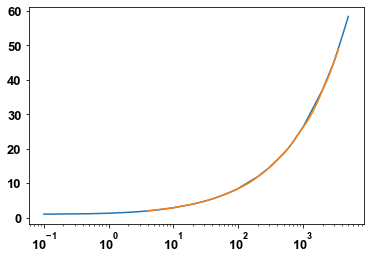

In [69]:
zVals =[ linear_interpolate(m1_lim_betaList,m1_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m1_lim_betaList,m1_lim_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))
plt.xscale("log")
plt.show()

In [70]:
print(zVals)

[4.073650444194416, 10.915102231718965, 20.51952568261933, 33.22968848697082, 48.493908910182626, 66.6290253173398, 89.1128501697647, 114.66193878982692, 144.00058912297428, 173.33923945612162, 203.48238169490733, 241.63495215649056, 279.78752261807375, 320.9145213499595, 365.3927047089655, 412.1081300723231, 466.6673172278267, 522.9398040831145, 581.9027421947767, 641.0699916162304, 700.3412049747548, 762.0373070888566, 826.8215365412035, 896.5453694365185, 978.3974846984527, 1068.0213121157278, 1160.1784122404572, 1252.3355123651868, 1344.4926124899162, 1436.6497126146455, 1528.806812739375, 1620.9639128641045, 1713.1210129888339, 1805.2781131135634, 1897.4352132382928, 1989.5923133630222, 2109.9828863708767, 2233.9679211112943, 2357.952955851712, 2481.937990592129, 2605.923025332547, 2729.9080600729644, 2853.893094813382, 2977.878129553799, 3112.914659399551, 3250.3512692413537, 3387.7878790831564, 3525.224488924959]


### simulation using interpolated beta values above|

These beta values correspond to mean chromosome numbers of (2, 3, ... 93)

In [18]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [71]:
m1_lim_betaList =[4.073650444194416, 10.915102231718965, 20.51952568261933, 33.22968848697082, 48.493908910182626, 66.6290253173398, 89.1128501697647, 114.66193878982692, 144.00058912297428, 173.33923945612162, 203.48238169490733, 241.63495215649056, 279.78752261807375, 320.9145213499595, 365.3927047089655, 412.1081300723231, 466.6673172278267, 522.9398040831145, 581.9027421947767, 641.0699916162304, 700.3412049747548, 762.0373070888566, 826.8215365412035, 896.5453694365185, 978.3974846984527, 1068.0213121157278, 1160.1784122404572, 1252.3355123651868, 1344.4926124899162, 1436.6497126146455, 1528.806812739375, 1620.9639128641045, 1713.1210129888339, 1805.2781131135634, 1897.4352132382928, 1989.5923133630222, 2109.9828863708767, 2233.9679211112943, 2357.952955851712, 2481.937990592129, 2605.923025332547, 2729.9080600729644, 2853.893094813382, 2977.878129553799, 3112.914659399551, 3250.3512692413537, 3387.7878790831564, 3525.224488924959]
print(m1_lim_betaList)

[4.073650444194416, 10.915102231718965, 20.51952568261933, 33.22968848697082, 48.493908910182626, 66.6290253173398, 89.1128501697647, 114.66193878982692, 144.00058912297428, 173.33923945612162, 203.48238169490733, 241.63495215649056, 279.78752261807375, 320.9145213499595, 365.3927047089655, 412.1081300723231, 466.6673172278267, 522.9398040831145, 581.9027421947767, 641.0699916162304, 700.3412049747548, 762.0373070888566, 826.8215365412035, 896.5453694365185, 978.3974846984527, 1068.0213121157278, 1160.1784122404572, 1252.3355123651868, 1344.4926124899162, 1436.6497126146455, 1528.806812739375, 1620.9639128641045, 1713.1210129888339, 1805.2781131135634, 1897.4352132382928, 1989.5923133630222, 2109.9828863708767, 2233.9679211112943, 2357.952955851712, 2481.937990592129, 2605.923025332547, 2729.9080600729644, 2853.893094813382, 2977.878129553799, 3112.914659399551, 3250.3512692413537, 3387.7878790831564, 3525.224488924959]


In [72]:
# burnInSteps = 50_000;

# nsamples,jumpsize, alpha =(150_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m1_lim_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
#     m1_lim_resListByBeta = p.map(parallel_simulate_pb_ef_softLimit,jobs)

# m1_lim_chrsByBeta = [x[0][burnInSteps:] for x in m1_lim_resListByBeta]
# m1_lim_timesByBeta = [x[1][burnInSteps:] for x in m1_lim_resListByBeta]

# np.save("./simulation_data/m1_soft_lim_chrsByBeta.npy",m1_lim_chrsByBeta)
# np.save("./simulation_data/m1_soft_lim_timesByBeta.npy",m1_lim_timesByBeta)


In [34]:
# m1_lim_chrsByBeta = np.load("./simulation_data/m1_soft_lim_chrsByBeta.npy")
# m1_lim_timesByBeta = np.load("./simulation_data/m1_soft_lim_timesByBeta.npy")

In [73]:
m1_lim_meanListByBeta = []
for ii,beta in enumerate( m1_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m1_lim_chrsByBeta[ii],m1_lim_timesByBeta[ii])
    m1_lim_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

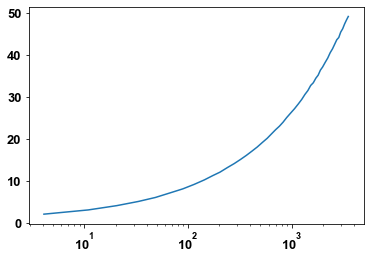

In [74]:
plt.plot(m1_lim_betaList,m1_lim_meanListByBeta)
plt.xscale("log")
plt.show()

In [75]:
print(m1_lim_meanListByBeta)

[1.9945927443368754, 3.0026392997069022, 4.020976667287671, 5.019484465125146, 5.970627945672593, 7.0330726876880885, 8.015451237941964, 9.082014815719921, 10.15746719988639, 11.171157417722789, 11.993971388884322, 13.129441970318867, 14.047564815976619, 15.015152155103578, 15.982015684132431, 16.9586156144077, 17.99736311647204, 19.082198301255428, 20.067063752552073, 21.133921783706672, 22.09948167569888, 22.9320143601026, 23.890154979611086, 24.998149780120958, 26.0629791608662, 27.12016102638364, 28.236076130261257, 29.31619705065108, 30.502197209410756, 31.441199674896666, 32.653644468525115, 33.30013964211818, 34.37164444007157, 35.10679477461936, 36.30631808744195, 37.020055995511335, 38.14854436392464, 39.19144204899167, 40.453499387543836, 41.372289632448904, 42.4805945026355, 43.539457602515725, 44.07150758640133, 45.35586144142999, 46.15973536428132, 47.31615986912458, 48.25411561589722, 49.08375459076987]


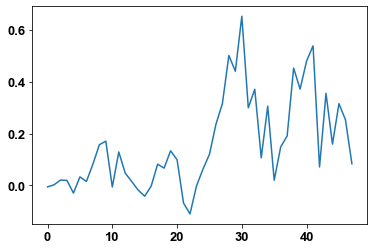

In [76]:
plt.plot(np.array(m1_lim_meanListByBeta) - list(range(2,49+1)))

# M2: Equal Break, Proportional Fuse

## M2 with no size limit

### finding beta list to get appx uniform sampling across chromosome number

In [34]:
rc, rt = simulate_eb_pf(1_000,1,850_000,1)
rc = rc[500:]
rt = rt[500:]

get_sim_mean_number(rc)

59.508

In [64]:
m2_betaList = [1/100,1/10,5/10] +list(range(1,10,3))+list(range(10,100,10)) + list(range(100,1000,100)) + list(range(1000,10_000,1_000))+ list(range(10_000,100_000,10_000))+ list(range(100_000,1_000_000,100_000))
print(m2_betaList)

[0.01, 0.1, 0.5, 1, 4, 7, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000]


In [70]:
burnInSteps = 10_000;

nsamples,jumpsize, alpha =(50_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m2_resListByBeta = p.map(parallel_simulate_eb_pf,jobs)

m2_chrsByBeta = [x[0][burnInSteps:] for x in m2_resListByBeta]
m2_timesByBeta = [x[1][burnInSteps:] for x in m2_resListByBeta]

In [71]:
m2_avgNumbs = []
for ii,beta in enumerate( m2_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_chrsByBeta[ii],m2_timesByBeta[ii])
    m2_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

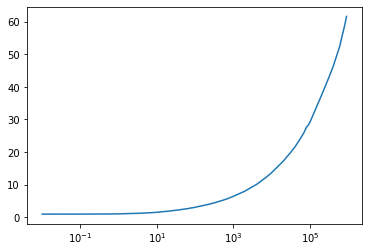

In [72]:
plt.plot(m2_betaList,m2_avgNumbs)
plt.xscale("log")
plt.show()

In [73]:
np.array(m2_avgNumbs[0:-1])<np.array(m2_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [74]:
print(m2_avgNumbs)

[1.000844852227674, 1.0084646346569268, 1.0407986193886956, 1.0784470695201558, 1.2810123664862567, 1.437651984266559, 1.5682367661647987, 1.9048310813117442, 2.1617666499183565, 2.350398688818729, 2.5178662224364716, 2.6512296807226043, 2.773093448535151, 2.9136849206618765, 2.9896883838820623, 3.114721757064181, 3.869890081939107, 4.373020341759086, 4.82418399820477, 5.162833181366771, 5.471150686198905, 5.730207215380034, 6.005782139345898, 6.234463919307176, 6.476133316040634, 8.060582607371561, 9.2750036853691, 10.10201738638537, 10.90694865406733, 11.644328003286448, 12.202712074182944, 12.787392739580309, 13.26300975819503, 13.751500755688898, 17.23563531936567, 19.682883445851868, 21.528130662317388, 23.24271787769891, 24.741067238453656, 26.058096183074415, 27.552567084241403, 28.27560544615413, 29.222065557949804, 37.42494587757409, 42.4467550085407, 46.157595366849364, 49.65283832354788, 52.49720942051929, 55.89721871819669, 58.684174262897095, 61.585470701248155]


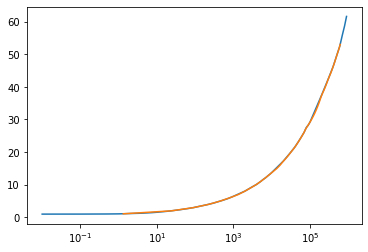

In [77]:
zVals =[ linear_interpolate(m2_betaList,m2_avgNumbs,cnum) for cnum in [1.1]+list(range(2,53+1))]
plt.plot(m2_betaList,m2_avgNumbs)
plt.plot(zVals,[1.1]+list(range(2,53+1)))
plt.xscale("log")
plt.show()

In [78]:
print(zVals)

[1.3191997464913916, 23.703999380247996, 90.824709104098, 225.86008603566134, 451.9168539411843, 797.9017904594924, 1330.6301355465416, 1961.764249759819, 2773.5516203139737, 3876.643656253812, 5126.191960801738, 6636.966588503346, 8447.01356784694, 10713.230903598807, 13583.384113022239, 16453.53732244567, 19323.690531869106, 23123.364044543443, 27209.58639844843, 31718.558637121554, 37137.886687459715, 42752.08711140199, 48584.39468391287, 55054.10915595567, 61966.036985017854, 69558.88453847806, 76302.59054351664, 86188.2320403437, 97653.72512605428, 109483.67416978025, 121674.51398500509, 133865.35380022993, 146056.19361545477, 158247.0334306796, 170437.87324590445, 182628.71306112927, 194819.55287635414, 211451.1345897215, 231364.27692389698, 251277.41925807242, 271190.56159224786, 291103.70392642333, 314908.8868838179, 341856.9607280881, 368805.0345723583, 395753.1084166285, 424101.4614316351, 452711.7758615242, 481322.09029141336, 512205.2174142032, 547362.3739844119, 582519.530

In [79]:
m2_betaList =[1.3191997464913916, 23.703999380247996, 90.824709104098, 225.86008603566134, 451.9168539411843, 797.9017904594924, 1330.6301355465416, 1961.764249759819, 2773.5516203139737, 3876.643656253812, 5126.191960801738, 6636.966588503346, 8447.01356784694, 10713.230903598807, 13583.384113022239, 16453.53732244567, 19323.690531869106, 23123.364044543443, 27209.58639844843, 31718.558637121554, 37137.886687459715, 42752.08711140199, 48584.39468391287, 55054.10915595567, 61966.036985017854, 69558.88453847806, 76302.59054351664, 86188.2320403437, 97653.72512605428, 109483.67416978025, 121674.51398500509, 133865.35380022993, 146056.19361545477, 158247.0334306796, 170437.87324590445, 182628.71306112927, 194819.55287635414, 211451.1345897215, 231364.27692389698, 251277.41925807242, 271190.56159224786, 291103.70392642333, 314908.8868838179, 341856.9607280881, 368805.0345723583, 395753.1084166285, 424101.4614316351, 452711.7758615242, 481322.09029141336, 512205.2174142032, 547362.3739844119, 582519.5305546205, 614787.9177808183]
print(m2_betaList)

[1.3191997464913916, 23.703999380247996, 90.824709104098, 225.86008603566134, 451.9168539411843, 797.9017904594924, 1330.6301355465416, 1961.764249759819, 2773.5516203139737, 3876.643656253812, 5126.191960801738, 6636.966588503346, 8447.01356784694, 10713.230903598807, 13583.384113022239, 16453.53732244567, 19323.690531869106, 23123.364044543443, 27209.58639844843, 31718.558637121554, 37137.886687459715, 42752.08711140199, 48584.39468391287, 55054.10915595567, 61966.036985017854, 69558.88453847806, 76302.59054351664, 86188.2320403437, 97653.72512605428, 109483.67416978025, 121674.51398500509, 133865.35380022993, 146056.19361545477, 158247.0334306796, 170437.87324590445, 182628.71306112927, 194819.55287635414, 211451.1345897215, 231364.27692389698, 251277.41925807242, 271190.56159224786, 291103.70392642333, 314908.8868838179, 341856.9607280881, 368805.0345723583, 395753.1084166285, 424101.4614316351, 452711.7758615242, 481322.09029141336, 512205.2174142032, 547362.3739844119, 582519.530

In [80]:
burnInSteps = 20_000;

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    m2_resListByBeta = p.map(parallel_simulate_eb_pf,jobs)

m2_chrsByBeta = [x[0][burnInSteps:] for x in m2_resListByBeta]
m2_timesByBeta = [x[1][burnInSteps:] for x in m2_resListByBeta]

In [81]:
m2_avgNumbs = []
for ii,beta in enumerate( m2_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_chrsByBeta[ii],m2_timesByBeta[ii])
    m2_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

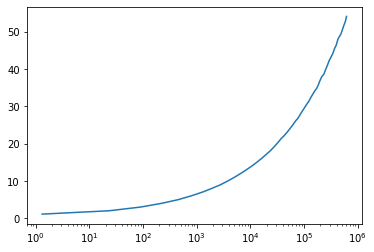

In [82]:
plt.plot(m2_betaList,m2_avgNumbs)
plt.xscale("log")
plt.show()

In [83]:
np.array(m2_avgNumbs[0:-1])<np.array(m2_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [84]:
print(m2_avgNumbs)

[1.1039436492288426, 2.0122284992914046, 3.0067198809064717, 4.019872073647138, 4.986898650205718, 6.027089492821408, 7.0987832178962735, 8.074447946811537, 8.989798795287484, 10.076532800478272, 11.050674627129434, 12.037671351873477, 13.028785872881206, 14.03441493998624, 15.169236227815821, 16.148718389953064, 17.02762812609025, 18.01121157836182, 19.064746091833726, 20.137701359265833, 21.328459164252827, 22.205659926178726, 23.12895255212921, 24.13180524307192, 25.103637627764073, 26.135438045092815, 26.76978890264638, 28.052703680700183, 29.253094352249626, 30.38532487937969, 31.314718119326784, 32.434818408088844, 33.3517963802956, 34.184105617759855, 34.79084683442965, 35.68735052027191, 36.739151996805596, 37.90592884813104, 38.541298285496296, 39.88280604726445, 41.030221679963724, 42.229506582879665, 43.15611927339652, 44.18060715498439, 45.53408321848833, 46.42686428097021, 47.96771946191222, 48.701766147981886, 49.338437733190744, 50.44000595421943, 51.68516871738291, 52.6

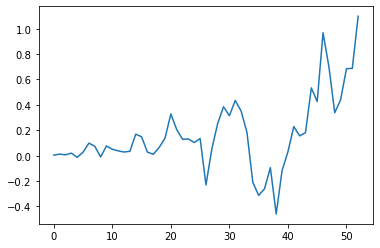

In [85]:
plt.plot(np.array(m2_avgNumbs) - np.array([1.1]+list(range(2,53+1))))

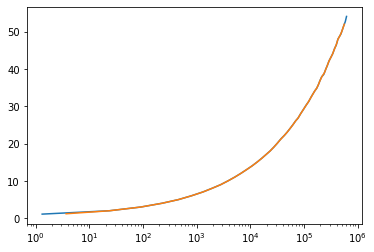

In [86]:
zVals =[ linear_interpolate(m2_betaList,m2_avgNumbs,cnum) for cnum in [1.2]+list(range(2,52+1))]
plt.plot(m2_betaList,m2_avgNumbs)
plt.plot(zVals,[1.2]+list(range(2,52+1)))
plt.xscale("log")
plt.show()

In [87]:
print(zVals)

[3.6865211494786756, 23.402626406295198, 90.37116754100308, 223.21148795278685, 456.274582822435, 788.8913703806543, 1281.5259755043812, 1913.6056584185742, 2783.906378351928, 3798.9588481107803, 5061.190753912942, 6579.303861591636, 8394.44266796403, 10635.675733251359, 13155.35733239558, 16017.751372763145, 19233.468576749125, 23080.05268419238, 26958.46322745038, 31139.88436709055, 35643.016819908924, 41435.83649369211, 47769.81984042427, 54203.79255782009, 61228.93888583546, 68562.21850495311, 78076.507576791, 85782.11800854836, 95236.30251979158, 105457.66217035466, 117546.36024474326, 129132.9190219293, 141379.2074175872, 155550.43702856434, 173281.98061387343, 186252.45747555958, 198537.7573256181, 214399.422824161, 238173.17717044, 253311.2941635743, 270666.07107848366, 287292.9353255671, 310898.09801332804, 337106.2798886237, 358171.29349713825, 382868.4599305951, 406297.547562839, 425359.63255642075, 466113.60575012554, 499869.3860425852, 528016.6429790611, 558405.6841112379]

In [106]:
m2_betaList = [3.6865211494786756, 23.402626406295198, 90.37116754100308, 223.21148795278685, 456.274582822435, 788.8913703806543, 1281.5259755043812, 1913.6056584185742, 2783.906378351928, 3798.9588481107803, 5061.190753912942, 6579.303861591636, 8394.44266796403, 10635.675733251359, 13155.35733239558, 16017.751372763145, 19233.468576749125, 23080.05268419238, 26958.46322745038, 31139.88436709055, 35643.016819908924, 41435.83649369211, 47769.81984042427, 54203.79255782009, 61228.93888583546, 68562.21850495311, 78076.507576791, 85782.11800854836, 95236.30251979158, 105457.66217035466, 117546.36024474326, 129132.9190219293, 141379.2074175872, 155550.43702856434, 173281.98061387343, 186252.45747555958, 198537.7573256181, 214399.422824161, 238173.17717044, 253311.2941635743, 270666.07107848366, 287292.9353255671, 310898.09801332804, 337106.2798886237, 358171.29349713825, 382868.4599305951, 406297.547562839, 425359.63255642075, 466113.60575012554, 499869.3860425852, 528016.6429790611, 558405.6841112379]
print(m2_betaList)

[3.6865211494786756, 23.402626406295198, 90.37116754100308, 223.21148795278685, 456.274582822435, 788.8913703806543, 1281.5259755043812, 1913.6056584185742, 2783.906378351928, 3798.9588481107803, 5061.190753912942, 6579.303861591636, 8394.44266796403, 10635.675733251359, 13155.35733239558, 16017.751372763145, 19233.468576749125, 23080.05268419238, 26958.46322745038, 31139.88436709055, 35643.016819908924, 41435.83649369211, 47769.81984042427, 54203.79255782009, 61228.93888583546, 68562.21850495311, 78076.507576791, 85782.11800854836, 95236.30251979158, 105457.66217035466, 117546.36024474326, 129132.9190219293, 141379.2074175872, 155550.43702856434, 173281.98061387343, 186252.45747555958, 198537.7573256181, 214399.422824161, 238173.17717044, 253311.2941635743, 270666.07107848366, 287292.9353255671, 310898.09801332804, 337106.2798886237, 358171.29349713825, 382868.4599305951, 406297.547562839, 425359.63255642075, 466113.60575012554, 499869.3860425852, 528016.6429790611, 558405.6841112379]

In [89]:
burnInSteps = 20_000;

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
    m2_resListByBeta = p.map(parallel_simulate_eb_pf,jobs)

m2_chrsByBeta = [x[0][burnInSteps:] for x in m2_resListByBeta]
m2_timesByBeta = [x[1][burnInSteps:] for x in m2_resListByBeta]

In [90]:
m2_avgNumbs = []
for ii,beta in enumerate( m2_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_chrsByBeta[ii],m2_timesByBeta[ii])
    m2_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

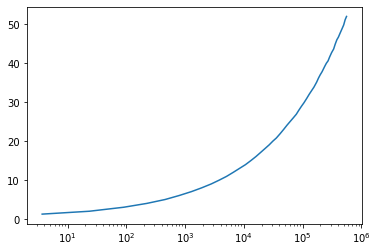

In [91]:
plt.plot(m2_betaList,m2_avgNumbs)
plt.xscale("log")
plt.show()

In [92]:
np.array(m2_avgNumbs[0:-1])<np.array(m2_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [93]:
print(m2_avgNumbs)

[1.2587811922245484, 1.9974311368378896, 3.028522901864426, 4.013256032097413, 5.012655424003401, 6.032515619563863, 7.043901587688821, 8.014868967621478, 9.015616253146428, 9.990178214498682, 10.948537985120787, 11.987037075889116, 12.993929048465985, 13.96908674118454, 15.018285063117792, 16.043009871946726, 17.096230802466344, 18.153472471007394, 19.060423612526346, 20.016711691247952, 20.80929976581516, 21.933642961039475, 23.065828183337693, 24.11561043145809, 25.04961887785403, 25.911823327935696, 26.92903294952341, 27.91902135115394, 28.94898724943376, 29.887948015372114, 31.013532484472634, 32.037076184826375, 32.939663263495035, 33.88055620103751, 35.18078908821778, 36.22523052397481, 37.02707077320458, 37.86328107544727, 39.262870662696685, 40.02532946474127, 40.6290266949674, 41.60356802679681, 42.744611318402136, 43.687066256455616, 44.928352970290106, 46.080655720857486, 46.747749549960744, 47.456627243502396, 48.81952912991201, 49.873898971061365, 51.17148179662096, 52.05

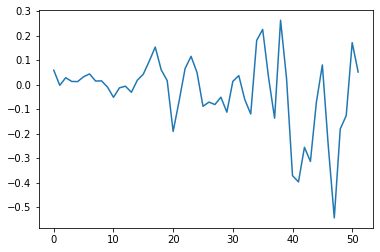

In [108]:
plt.plot(np.array(m2_avgNumbs) - np.array([1.2]+list(range(2,52+1))))

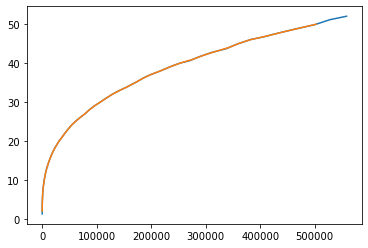

In [109]:
zVals =[ linear_interpolate(m2_betaList,m2_avgNumbs,cnum) for cnum in list(range(2,50+1))]
plt.plot(m2_betaList,m2_avgNumbs)
plt.plot(zVals,list(range(2,50+1)))
plt.xscale("linear")
plt.show()

In [110]:
print(zVals)

[23.569471903637325, 88.51862910399996, 221.42325163053314, 453.32329797174566, 778.2867394990128, 1260.1420113235424, 1903.9262680150605, 2770.325690647271, 3811.894878411448, 5136.419668439857, 6602.6723134599215, 8408.395711064022, 10709.914862097252, 13111.445198613095, 15897.610628558881, 18939.6545838087, 22521.670636385144, 26700.072708759995, 31066.811596846732, 36625.53894755928, 41807.06937276224, 47401.54563158042, 53495.231936625045, 60855.730400514425, 69386.96330642577, 78628.88217386992, 86525.4310531263, 95791.61823607811, 106661.09260848518, 117401.02231278268, 128713.21501263673, 142287.96729118365, 157179.3167071051, 170816.52259547662, 183455.41476952864, 198122.99569908384, 216721.76228453944, 233707.99493649928, 252808.39433528378, 276995.3283204419, 295494.0625666956, 318000.0534978342, 342416.86083084816, 359706.8956783678, 381139.7755541611, 413080.691625807, 441607.7564847175, 471891.40287797054, 502604.77833629795]


### simulation set using the interpolated beta values obtained above

From interpolation in previous section, the following beta values approximate simulations with mean chr number = 2, 3, 4, ....

In [6]:
m2_betaList =[23.569471903637325, 88.51862910399996, 221.42325163053314, 453.32329797174566, 778.2867394990128, 1260.1420113235424, 1903.9262680150605, 2770.325690647271, 3811.894878411448, 5136.419668439857, 6602.6723134599215, 8408.395711064022, 10709.914862097252, 13111.445198613095, 15897.610628558881, 18939.6545838087, 22521.670636385144, 26700.072708759995, 31066.811596846732, 36625.53894755928, 41807.06937276224, 47401.54563158042, 53495.231936625045, 60855.730400514425, 69386.96330642577, 78628.88217386992, 86525.4310531263, 95791.61823607811, 106661.09260848518, 117401.02231278268, 128713.21501263673, 142287.96729118365, 157179.3167071051, 170816.52259547662, 183455.41476952864, 198122.99569908384, 216721.76228453944, 233707.99493649928, 252808.39433528378, 276995.3283204419, 295494.0625666956, 318000.0534978342, 342416.86083084816, 359706.8956783678, 381139.7755541611, 413080.691625807, 441607.7564847175, 471891.40287797054, 502604.77833629795]
print(m2_betaList)

[23.569471903637325, 88.51862910399996, 221.42325163053314, 453.32329797174566, 778.2867394990128, 1260.1420113235424, 1903.9262680150605, 2770.325690647271, 3811.894878411448, 5136.419668439857, 6602.6723134599215, 8408.395711064022, 10709.914862097252, 13111.445198613095, 15897.610628558881, 18939.6545838087, 22521.670636385144, 26700.072708759995, 31066.811596846732, 36625.53894755928, 41807.06937276224, 47401.54563158042, 53495.231936625045, 60855.730400514425, 69386.96330642577, 78628.88217386992, 86525.4310531263, 95791.61823607811, 106661.09260848518, 117401.02231278268, 128713.21501263673, 142287.96729118365, 157179.3167071051, 170816.52259547662, 183455.41476952864, 198122.99569908384, 216721.76228453944, 233707.99493649928, 252808.39433528378, 276995.3283204419, 295494.0625666956, 318000.0534978342, 342416.86083084816, 359706.8956783678, 381139.7755541611, 413080.691625807, 441607.7564847175, 471891.40287797054, 502604.77833629795]


In [7]:
# burnInSteps = 20_000;

# nsamples,jumpsize, alpha =(120_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()) as p:
#     m2_resListByBeta = p.map(parallel_simulate_eb_pf,jobs)

# m2_chrsByBeta = [x[0][burnInSteps:] for x in m2_resListByBeta]
# m2_timesByBeta = [x[1][burnInSteps:] for x in m2_resListByBeta]

# np.save("./simulation_data/m2_chrsByBeta.npy",m2_chrsByBeta)
# np.save("./simulation_data/m2_timesByBeta.npy",m2_timesByBeta)


In [ ]:
m2_chrsByBeta = np.load("./simulation_data/m2_chrsByBeta.npy")
m2_timesByBeta = np.load("./simulation_data/m2_timesByBeta.npy")

In [8]:
m2_meanListByBeta = []
for ii,beta in enumerate( m2_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_chrsByBeta[ii],m2_timesByBeta[ii])
    m2_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

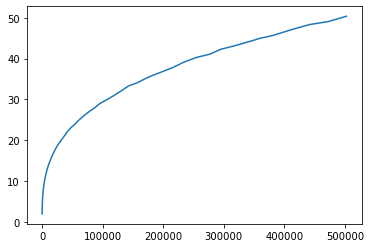

In [9]:
plt.plot(m2_betaList,m2_meanListByBeta)
plt.xscale("linear")
plt.show()

In [10]:
print(m2_meanListByBeta)

[1.99323030468753, 3.0040208666532386, 3.9830339812196227, 5.008873120281631, 5.965824893698214, 6.989965352479549, 7.989211521380879, 9.0247850488777, 10.018655274964699, 11.010503010330357, 12.01061820791844, 12.947072084208756, 14.07264157170326, 14.959282683346323, 16.035289364408445, 16.976249560522696, 18.023265209619115, 19.047298299452144, 19.953690840124054, 21.057514585890377, 22.14653805440717, 23.06483423352441, 23.853613355427598, 24.980737931424642, 26.07065375147466, 27.158837819873032, 27.93204390187936, 29.051261582287943, 29.94522289085063, 30.84541378078358, 31.917168345593733, 33.2725354314374, 34.08423922245113, 35.12604146736737, 35.94754480818743, 36.77175771138244, 37.87487656667882, 39.09531717585065, 40.187408227990296, 41.096573165728, 42.294992838427476, 43.13449821284278, 44.177875219868795, 44.95020024257015, 45.65385888586753, 47.139306810544284, 48.315574022225924, 49.03358363425168, 50.3537054647052]


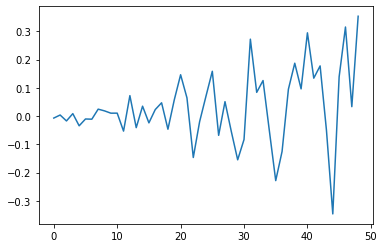

In [11]:
plt.plot(np.array(m2_meanListByBeta) - list(range(2,50+1)))

## M2 with size limit

### finding beta list to get appx uniform sampling across chromosome number

In [23]:
rc, rt = simulate_eb_pf_softLimit(10000,1,900_000,1)
rc = rc[5000:]
rt = rt[5000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

56.681021899617804

In [19]:
rc, rt = simulate_eb_pf_softLimit(10000,1,1,1)
rc = rc[5000:]
rt = rt[5000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

1.0629468245082914

In [24]:
tens = [10**x for x in [0,1,2,3,4,5]]
allVals =[ [x*power for x in [1,2,3,4,5,6,7,8,9]] for power in tens]
m2_lim_betaList =flatten(allVals)
m2_lim_betaList = m2_lim_betaList[:]
print(m2_lim_betaList)

[     1      2      3      4      5      6      7      8      9     10
     20     30     40     50     60     70     80     90    100    200
    300    400    500    600    700    800    900   1000   2000   3000
   4000   5000   6000   7000   8000   9000  10000  20000  30000  40000
  50000  60000  70000  80000  90000 100000 200000 300000 400000 500000
 600000 700000 800000 900000]


In [31]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m2_lim_resListByBeta = p.map(parallel_simulate_eb_pf_softLimit,jobs)

m2_lim_chrsByBeta = [x[0][burnInSteps:-1] for x in m2_lim_resListByBeta]
m2_lim_timesByBeta = [x[1][burnInSteps:-1] for x in m2_lim_resListByBeta]

In [32]:
m2_lim_avgNumbs = []
for ii,beta in enumerate( m2_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_lim_chrsByBeta[ii],m2_lim_timesByBeta[ii])
    m2_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

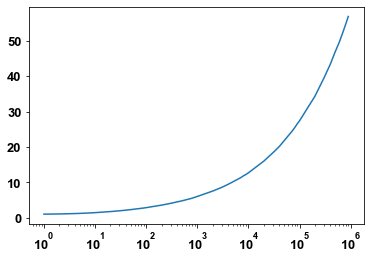

In [33]:
plt.plot(m2_lim_betaList,m2_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [34]:
print(m2_lim_avgNumbs)

[1.064305608811678, 1.123953930247775, 1.1802561956092834, 1.2313338352730387, 1.2786442246288736, 1.3257728876509418, 1.369916977437757, 1.4112139195973532, 1.452363798103783, 1.4892149020337206, 1.7941834242398207, 2.0093078909145263, 2.1958572329666906, 2.3455183785662594, 2.487725013206514, 2.6049017962529497, 2.7071161854860124, 2.8003222507865093, 2.8994250940870194, 3.609798435066674, 4.110260712472388, 4.511227691868852, 4.819245628518824, 5.111121722190285, 5.352927565739684, 5.591068984536094, 5.838510227701614, 6.057672143131175, 7.5753907663742925, 8.613925986698852, 9.473762752829327, 10.207546078699474, 10.811130423617433, 11.322857165533247, 11.879235863832212, 12.285672812412466, 12.724879052207257, 16.01836240157908, 18.359715426517134, 20.121470937471287, 21.775033012018824, 23.161225713491984, 24.298555510115367, 25.422537005131666, 26.52798674891197, 27.39625170767741, 34.32935058166819, 39.452196843678124, 43.359028271903824, 46.91571013341169, 49.5871566827103, 52

In [35]:
np.array(m2_lim_avgNumbs[0:-1])<np.array(m2_lim_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

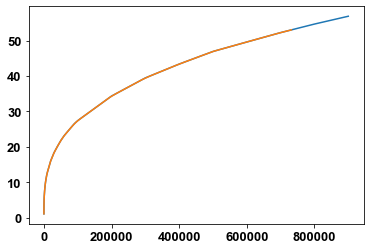

In [36]:
zVals =[ linear_interpolate(m2_lim_betaList,m2_lim_avgNumbs,cnum) for cnum in [1.1]+list(range(2,53+1))]
plt.plot(m2_lim_betaList,m2_lim_avgNumbs)
plt.plot(zVals,[1.1]+list(range(2,53+1)))

In [37]:
print(zVals)

[1.5984140094631587, 29.567325322944278, 114.15803495304043, 277.96822708717326, 561.9284605352555, 973.6851436901633, 1620.8844264263057, 2408.8539563376676, 3449.008496157471, 4717.15618032972, 6369.08287355762, 8297.128832872197, 10835.349441937267, 13871.648381146215, 16907.947320355164, 19944.246259564112, 24192.60823961774, 28463.642933441653, 33634.35544547321, 39310.51194836054, 45312.94879128807, 51622.91280095542, 58836.91702228238, 67374.94338931638, 76240.71208462788, 85223.78333449682, 95436.28124483072, 108708.2025411108, 123131.76721507582, 137555.33188904083, 151978.89656300587, 166402.46123697088, 180826.0259109359, 195249.59058490093, 213091.3438356568, 232611.74224026658, 252132.1406448764, 271652.53904948616, 291172.937454096, 314021.67373703816, 339617.86385610234, 365214.0539751665, 390810.24409423064, 418021.62107983517, 446137.71464509, 474253.80821034487, 503155.21441409475, 540588.1175827002, 578021.0207513057, 615565.2976899651, 653267.9733494639, 690970.6490

In [38]:
m2_lim_betaList = [1.5984140094631587, 29.567325322944278, 114.15803495304043, 277.96822708717326, 561.9284605352555, 973.6851436901633, 1620.8844264263057, 2408.8539563376676, 3449.008496157471, 4717.15618032972, 6369.08287355762, 8297.128832872197, 10835.349441937267, 13871.648381146215, 16907.947320355164, 19944.246259564112, 24192.60823961774, 28463.642933441653, 33634.35544547321, 39310.51194836054, 45312.94879128807, 51622.91280095542, 58836.91702228238, 67374.94338931638, 76240.71208462788, 85223.78333449682, 95436.28124483072, 108708.2025411108, 123131.76721507582, 137555.33188904083, 151978.89656300587, 166402.46123697088, 180826.0259109359, 195249.59058490093, 213091.3438356568, 232611.74224026658, 252132.1406448764, 271652.53904948616, 291172.937454096, 314021.67373703816, 339617.86385610234, 365214.0539751665, 390810.24409423064, 418021.62107983517, 446137.71464509, 474253.80821034487, 503155.21441409475, 540588.1175827002, 578021.0207513057, 615565.2976899651, 653267.9733494639, 690970.6490089627, 731568.3470156529]
print(m2_lim_betaList)

[1.5984140094631587, 29.567325322944278, 114.15803495304043, 277.96822708717326, 561.9284605352555, 973.6851436901633, 1620.8844264263057, 2408.8539563376676, 3449.008496157471, 4717.15618032972, 6369.08287355762, 8297.128832872197, 10835.349441937267, 13871.648381146215, 16907.947320355164, 19944.246259564112, 24192.60823961774, 28463.642933441653, 33634.35544547321, 39310.51194836054, 45312.94879128807, 51622.91280095542, 58836.91702228238, 67374.94338931638, 76240.71208462788, 85223.78333449682, 95436.28124483072, 108708.2025411108, 123131.76721507582, 137555.33188904083, 151978.89656300587, 166402.46123697088, 180826.0259109359, 195249.59058490093, 213091.3438356568, 232611.74224026658, 252132.1406448764, 271652.53904948616, 291172.937454096, 314021.67373703816, 339617.86385610234, 365214.0539751665, 390810.24409423064, 418021.62107983517, 446137.71464509, 474253.80821034487, 503155.21441409475, 540588.1175827002, 578021.0207513057, 615565.2976899651, 653267.9733494639, 690970.6490

In [39]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m2_lim_resListByBeta = p.map(parallel_simulate_eb_pf_softLimit,jobs)

m2_lim_chrsByBeta = [x[0][burnInSteps:-1] for x in m2_lim_resListByBeta]
m2_lim_timesByBeta = [x[1][burnInSteps:-1] for x in m2_lim_resListByBeta]

In [40]:
m2_lim_avgNumbs = []
for ii,beta in enumerate( m2_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_lim_chrsByBeta[ii],m2_lim_timesByBeta[ii])
    m2_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

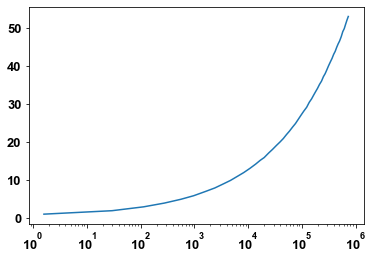

In [41]:
plt.plot(m2_lim_betaList,m2_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [42]:
print(m2_lim_avgNumbs)

[1.0998563377833486, 2.009364802705094, 3.0252619263521074, 4.013471379940476, 5.007754545099324, 5.947300367471505, 7.076677454472605, 7.98718345021414, 9.038332025434475, 9.97423619163689, 11.064381391828292, 12.028817061153774, 13.144521399363807, 14.272424334176337, 15.274511469388866, 15.981332831633779, 17.18805791440752, 18.119392475319383, 19.158152772217125, 20.08331001682582, 20.990843578593726, 21.998252862667627, 22.925959412477276, 24.008266851158066, 24.936776109426383, 25.966486971457925, 27.017050421264937, 28.193234848246316, 29.214546393867785, 30.52669217910533, 31.41922437116377, 32.43801876891003, 33.34283879308979, 34.14609813173129, 35.21287100541973, 36.09195563727646, 37.2637887684329, 38.05592500043951, 39.022554863906045, 40.11585792719667, 41.14513740497925, 42.072198558077346, 43.12612890564384, 43.93120908114956, 45.01423967468532, 45.89710255577279, 46.615006335483216, 47.76964958420077, 49.11152351964174, 49.89249428353634, 51.07016438427437, 52.12608239

In [43]:
np.array(m2_lim_avgNumbs[0:-1])<np.array(m2_lim_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

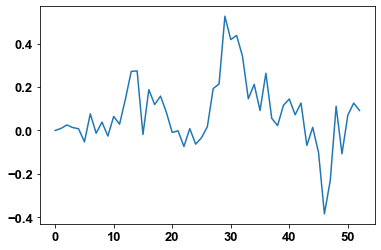

In [44]:
plt.plot(np.array(m2_lim_avgNumbs) - np.array([1.1]+list(range(2,53+1))))

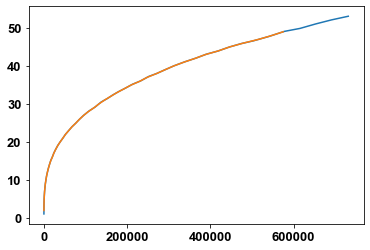

In [47]:
zVals =[ linear_interpolate(m2_lim_betaList,m2_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m2_lim_betaList,m2_lim_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))

In [48]:
print(zVals)

[29.27934192704531, 112.05455003610655, 275.73514853449575, 559.7138173492411, 1003.8851227454024, 1576.9437496515739, 2421.536456945914, 3411.077388019119, 4756.196780377086, 6271.523998198954, 8239.519372662464, 10506.564134079943, 13138.285880398933, 16076.184438647946, 20009.96536120077, 23530.536898744747, 27916.11745154465, 32847.106914163516, 38799.3764667792, 45370.3005453808, 51636.498838580745, 59421.00289835308, 67309.7284691954, 76792.2695505715, 85549.56254756365, 95270.53457663047, 106527.76413469043, 120101.8163633649, 131765.74753487395, 145204.11590614522, 160201.21783029303, 175360.8976282618, 192626.2088818813, 209531.0808718946, 230569.83340676205, 247737.9468662878, 270274.3944258123, 290717.4581170219, 311600.3805808318, 336008.57727123826, 363220.6493192878, 387747.0251103352, 419807.4726729323, 445768.044546959, 478396.2586570299, 515636.49863793614, 547013.9706987956, 574909.9616558778]


### simulation using interpolated beta values above|

These beta values correspond to mean chromosome numbers of (2, 3, ... 93)

In [195]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [50]:
m2_lim_betaList=[29.27934192704531, 112.05455003610655, 275.73514853449575, 559.7138173492411, 1003.8851227454024, 1576.9437496515739, 2421.536456945914, 3411.077388019119, 4756.196780377086, 6271.523998198954, 8239.519372662464, 10506.564134079943, 13138.285880398933, 16076.184438647946, 20009.96536120077, 23530.536898744747, 27916.11745154465, 32847.106914163516, 38799.3764667792, 45370.3005453808, 51636.498838580745, 59421.00289835308, 67309.7284691954, 76792.2695505715, 85549.56254756365, 95270.53457663047, 106527.76413469043, 120101.8163633649, 131765.74753487395, 145204.11590614522, 160201.21783029303, 175360.8976282618, 192626.2088818813, 209531.0808718946, 230569.83340676205, 247737.9468662878, 270274.3944258123, 290717.4581170219, 311600.3805808318, 336008.57727123826, 363220.6493192878, 387747.0251103352, 419807.4726729323, 445768.044546959, 478396.2586570299, 515636.49863793614, 547013.9706987956, 574909.9616558778]

In [51]:
# burnInSteps = 50_000;

# nsamples,jumpsize, alpha =(150_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m2_lim_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m2_lim_resListByBeta = p.map(parallel_simulate_eb_pf_softLimit,jobs)

# m2_lim_chrsByBeta = [x[0][burnInSteps:-1] for x in m2_lim_resListByBeta]
# m2_lim_timesByBeta = [x[1][burnInSteps:-1] for x in m2_lim_resListByBeta]

# np.save("./simulation_data/m2_soft_lim_chrsByBeta.npy",m2_lim_chrsByBeta)
# np.save("./simulation_data/m2_soft_lim_timesByBeta.npy",m2_lim_timesByBeta)


In [15]:
m2_lim_chrsByBeta = np.load("./simulation_data/m2_soft_lim_chrsByBeta.npy")
m2_lim_timesByBeta = np.load("./simulation_data/m2_soft_lim_timesByBeta.npy")

In [52]:
m2_lim_meanListByBeta = []
for ii,beta in enumerate( m2_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m2_lim_chrsByBeta[ii],m2_lim_timesByBeta[ii])
    m2_lim_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

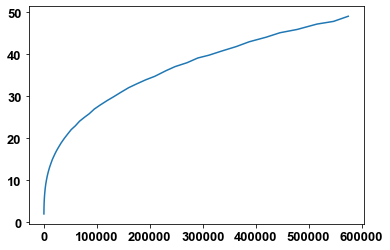

In [53]:
plt.plot(m2_lim_betaList,m2_lim_meanListByBeta)
plt.xscale("linear")
plt.show()

In [54]:
print(m2_lim_meanListByBeta)

[2.004635694203631, 3.012905303137922, 3.992180520522701, 4.996263564490143, 6.011806722018199, 6.957725202052379, 8.048792056439934, 9.016751421267966, 10.02580772922937, 10.996568844083564, 12.015416926575726, 13.021040167798978, 13.986158718069397, 15.002015275493502, 16.09315379873701, 16.98936306608207, 17.946926296741637, 18.97087425437048, 20.041031609697708, 21.1067867833192, 22.092376881550244, 22.991168672821846, 24.081391576639625, 25.0412539738012, 25.85752234826334, 26.985260282202923, 27.962104937328103, 29.05224001111168, 29.915370286441174, 30.960399603258672, 32.078338028281955, 32.9840271902646, 33.96318549796932, 34.785979236995914, 36.11703348565748, 37.09257318395543, 38.01462984433335, 39.14355618040429, 39.80782471455099, 40.805075605913885, 41.85998850708492, 43.00541810491934, 44.097132286975096, 45.15524507511782, 45.94353229514157, 47.21861461766564, 47.85991363478239, 49.08739472834507]


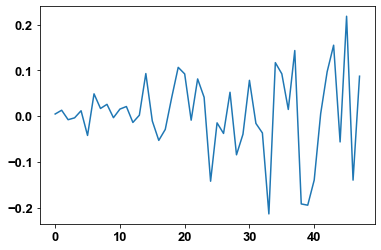

In [55]:
plt.plot(np.array(m2_lim_meanListByBeta) - list(range(2,49+1)))

# M3: Proportional Break, Proportional Fuse

## M3 with no size limit

### finding beta list to get appx uniform sampling across chromosome number

In [6]:
rc, rt = simulate_pb_pf(1_000,1,30_000_000,1)
rc = rc[500:]
rt = rt[500:]

xvals,yvals = get_prob_observing_n_chrs(rc,rt)
np.sum([a*b for a,b in list(zip(xvals,yvals))])

57.85025789500639

In [47]:
m3_betaList = [0.1,0.3,0.5,0.8] +list(range(1,10,3)) + list(range(10,100,25))+list(range(100,1000,250))+list(range(1_000,10_000,2_500)) + list(range(10_000,100_000,25_000)) + list(range(100_000,1_000_000,250_000))+ list(range(1_000_000,50_000_000,2_500_000))
print(m3_betaList)

[0.1, 0.3, 0.5, 0.8, 1, 4, 7, 10, 35, 60, 85, 100, 350, 600, 850, 1000, 3500, 6000, 8500, 10000, 35000, 60000, 85000, 100000, 350000, 600000, 850000, 1000000, 3500000, 6000000, 8500000, 11000000, 13500000, 16000000, 18500000, 21000000, 23500000, 26000000, 28500000, 31000000, 33500000, 36000000, 38500000, 41000000, 43500000, 46000000, 48500000]


In [48]:
burnInSteps = 10_000;

nsamples,jumpsize, alpha =(50_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m3_resListByBeta = p.map(parallel_simulate_pb_pf,jobs)

m3_chrsByBeta = [x[0][burnInSteps:] for x in m3_resListByBeta]
m3_timesByBeta = [x[1][burnInSteps:] for x in m3_resListByBeta]

In [49]:
m3_avgNumbs = []
for ii,beta in enumerate( m3_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m3_chrsByBeta[ii],m3_timesByBeta[ii])
    m3_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

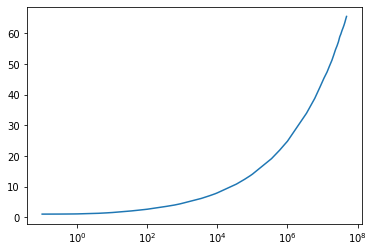

In [50]:
plt.plot(m3_betaList,m3_avgNumbs)
plt.xscale("log")
plt.show()

In [51]:
np.array(m3_avgNumbs[0:-1])<np.array(m3_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [52]:
print(m3_avgNumbs)

[1.008313351534938, 1.0244999294158879, 1.0407979872154094, 1.0632268191297618, 1.078480577242301, 1.2740972916183098, 1.4184831945270393, 1.5275545885175128, 2.047417324331895, 2.329939936736125, 2.5171895686488, 2.6092901147775374, 3.5354596113217425, 3.9819246997848143, 4.343887143560327, 4.542281043042695, 6.143615084678598, 7.016815194201266, 7.629228517074727, 7.955351670416538, 10.817954148212426, 12.38454724296873, 13.49742481349832, 14.05433613080454, 19.114921863551515, 21.904582632491678, 23.902827261023866, 24.81759722295673, 33.96681802640742, 38.792611308942924, 42.53711372171664, 45.39863215816772, 47.426014468060565, 49.51018989513898, 51.20724909949972, 53.02964468839704, 54.730608447294564, 55.97509085738169, 57.2953969008833, 58.898571058558346, 59.86035194965938, 60.958352831096576, 61.82193503694748, 62.68563064096352, 63.63883285083037, 64.65961853798888, 65.56846799454401]


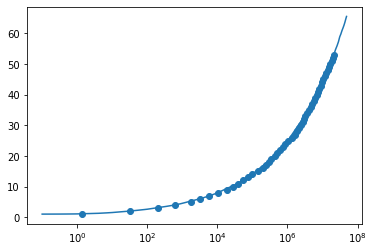

In [58]:
zVals =[ linear_interpolate(m3_betaList,m3_avgNumbs,cnum) for cnum in [1.1]+list(range(2,53+1))]
plt.plot(m3_betaList,m3_avgNumbs)
plt.scatter(zVals,[1.1]+list(range(2,53+1)))
plt.xscale("log")
plt.show()

In [59]:
print(zVals)

[1.3300242951070396, 32.71971902075198, 205.46392606329334, 612.4842373331941, 1714.590062186065, 3275.7883724686785, 5951.857558141919, 10389.927783632047, 19123.23958431532, 27856.55138499859, 37905.12342351242, 53863.31964158584, 73825.70673830705, 98536.49596131309, 146717.11532699087, 196118.51137137634, 245519.90741576182, 294921.3034601473, 344322.69950453273, 429317.72084108455, 518934.3519323907, 611937.6484422744, 737047.4555351315, 865933.9631306016, 1049841.0686991166, 1323088.3816350016, 1596335.694570887, 1869583.007506772, 2142830.320442657, 2416077.633378542, 2689324.9463144275, 2962572.2592503126, 3235819.5721861976, 3517189.9062236403, 4035239.4482642147, 4553288.9903047895, 5071338.532345364, 5589388.074385938, 6138462.116054196, 6806107.566480849, 7473753.016907502, 8141398.467334155, 8904406.164561916, 9778068.192439869, 10651730.220317822, 11741557.03008978, 12974674.23141928, 14188504.34143162, 15388019.491413254, 16721557.184926743, 18194693.76942305, 19587512.0

In [60]:
m3_betaList =[1.3300242951070396, 32.71971902075198, 205.46392606329334, 612.4842373331941, 1714.590062186065, 3275.7883724686785, 5951.857558141919, 10389.927783632047, 19123.23958431532, 27856.55138499859, 37905.12342351242, 53863.31964158584, 73825.70673830705, 98536.49596131309, 146717.11532699087, 196118.51137137634, 245519.90741576182, 294921.3034601473, 344322.69950453273, 429317.72084108455, 518934.3519323907, 611937.6484422744, 737047.4555351315, 865933.9631306016, 1049841.0686991166, 1323088.3816350016, 1596335.694570887, 1869583.007506772, 2142830.320442657, 2416077.633378542, 2689324.9463144275, 2962572.2592503126, 3235819.5721861976, 3517189.9062236403, 4035239.4482642147, 4553288.9903047895, 5071338.532345364, 5589388.074385938, 6138462.116054196, 6806107.566480849, 7473753.016907502, 8141398.467334155, 8904406.164561916, 9778068.192439869, 10651730.220317822, 11741557.03008978, 12974674.23141928, 14188504.34143162, 15388019.491413254, 16721557.184926743, 18194693.76942305, 19587512.098539416, 20959332.802688878]
print(m3_betaList)

[1.3300242951070396, 32.71971902075198, 205.46392606329334, 612.4842373331941, 1714.590062186065, 3275.7883724686785, 5951.857558141919, 10389.927783632047, 19123.23958431532, 27856.55138499859, 37905.12342351242, 53863.31964158584, 73825.70673830705, 98536.49596131309, 146717.11532699087, 196118.51137137634, 245519.90741576182, 294921.3034601473, 344322.69950453273, 429317.72084108455, 518934.3519323907, 611937.6484422744, 737047.4555351315, 865933.9631306016, 1049841.0686991166, 1323088.3816350016, 1596335.694570887, 1869583.007506772, 2142830.320442657, 2416077.633378542, 2689324.9463144275, 2962572.2592503126, 3235819.5721861976, 3517189.9062236403, 4035239.4482642147, 4553288.9903047895, 5071338.532345364, 5589388.074385938, 6138462.116054196, 6806107.566480849, 7473753.016907502, 8141398.467334155, 8904406.164561916, 9778068.192439869, 10651730.220317822, 11741557.03008978, 12974674.23141928, 14188504.34143162, 15388019.491413254, 16721557.184926743, 18194693.76942305, 19587512.0

In [61]:
burnInSteps = 20_000;

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m3_resListByBeta = p.map(parallel_simulate_pb_pf,jobs)

m3_chrsByBeta = [x[0][burnInSteps:] for x in m3_resListByBeta]
m3_timesByBeta = [x[1][burnInSteps:] for x in m3_resListByBeta]

In [62]:
m3_avgNumbs = []
for ii,beta in enumerate( m3_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m3_chrsByBeta[ii],m3_timesByBeta[ii])
    m3_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

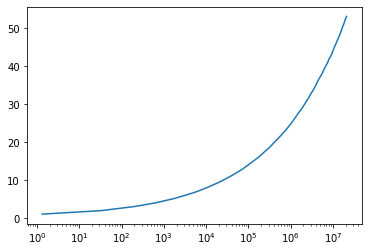

In [63]:
plt.plot(m3_betaList,m3_avgNumbs)
plt.xscale("log")
plt.show()

In [64]:
np.array(m3_avgNumbs[0:-1])<np.array(m3_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [65]:
print(m3_avgNumbs)

[1.1029419986610391, 2.0166562369011825, 3.110130160302025, 4.033220331219215, 5.169597450063133, 6.074460225406075, 6.995297013524647, 8.053874921459203, 9.34943307200445, 10.253512364341757, 11.06119661738962, 12.043843377816538, 12.987951656567105, 14.017613214895176, 15.450089894735058, 16.574692033812966, 17.580209387930445, 18.328443516327333, 19.076139153800614, 20.260004147227416, 21.118145795318213, 22.00834258851197, 22.97076100159524, 23.94301835262369, 25.076237463583677, 26.687728005125717, 27.986433161668014, 28.9774816084096, 30.032640064653055, 30.957938197414578, 31.739654314590933, 32.659801678480605, 33.32183220144359, 33.96402091347721, 35.25319853582947, 36.464903700965806, 37.295172592531756, 38.12051962169281, 39.173784120854165, 40.13740198628791, 40.9312190674489, 42.00437726642287, 42.66366988633415, 43.77349243844284, 44.84994083735099, 45.87975856168848, 47.04741217287707, 48.03923345665443, 49.042949811340016, 50.191079346093055, 51.18863289341188, 52.33169

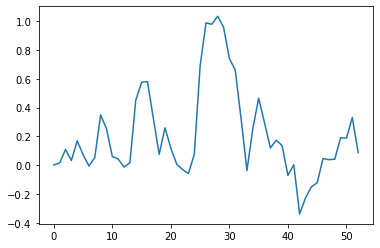

In [66]:
plt.plot(np.array(m3_avgNumbs) - np.array([1.1]+list(range(2,53+1))))

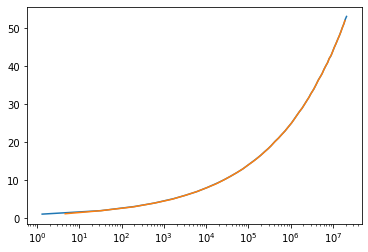

In [67]:
zVals =[ linear_interpolate(m3_betaList,m3_avgNumbs,cnum) for cnum in [1.2]+list(range(2,52+1))]
plt.plot(m3_betaList,m3_avgNumbs)
plt.plot(zVals,[1.2]+list(range(2,52+1)))
plt.xscale("log")
plt.show()

In [68]:
print(zVals)

[4.664350176445119, 32.14751146424816, 188.0658456832207, 597.8363188748065, 1550.107396620845, 3147.3189721851168, 5971.574750509812, 10164.058073867152, 16767.723569846086, 25407.648349733678, 37143.76325580773, 53151.30261345717, 74114.85424764991, 98113.79741799665, 131578.5722681316, 170873.50446677816, 217014.03067037294, 273236.1549050274, 339292.06898741546, 410650.84736827534, 506596.2627864121, 611066.0566336195, 740923.49965657, 875181.3626300909, 1037468.6941706975, 1206475.9507289303, 1388790.3487633253, 1600076.2807465063, 1875414.4444414866, 2134377.741678086, 2430780.2527580955, 2766637.300578813, 3102986.143499076, 3531647.921141832, 3933492.890414051, 4354525.1686195, 4887164.431716834, 5513740.943398714, 6047867.25627193, 6710908.1992675625, 7516543.797183652, 8138675.23229264, 9169168.17411329, 9961905.202890573, 10810533.56448441, 11868539.710975425, 12924603.932002652, 14140488.885637367, 15336691.295802314, 16499620.981080364, 17916130.260655716, 19183340.2321349

In [69]:
m3_betaList = [4.664350176445119, 32.14751146424816, 188.0658456832207, 597.8363188748065, 1550.107396620845, 3147.3189721851168, 5971.574750509812, 10164.058073867152, 16767.723569846086, 25407.648349733678, 37143.76325580773, 53151.30261345717, 74114.85424764991, 98113.79741799665, 131578.5722681316, 170873.50446677816, 217014.03067037294, 273236.1549050274, 339292.06898741546, 410650.84736827534, 506596.2627864121, 611066.0566336195, 740923.49965657, 875181.3626300909, 1037468.6941706975, 1206475.9507289303, 1388790.3487633253, 1600076.2807465063, 1875414.4444414866, 2134377.741678086, 2430780.2527580955, 2766637.300578813, 3102986.143499076, 3531647.921141832, 3933492.890414051, 4354525.1686195, 4887164.431716834, 5513740.943398714, 6047867.25627193, 6710908.1992675625, 7516543.797183652, 8138675.23229264, 9169168.17411329, 9961905.202890573, 10810533.56448441, 11868539.710975425, 12924603.932002652, 14140488.885637367, 15336691.295802314, 16499620.981080364, 17916130.260655716, 19183340.23213491]
print(m3_betaList)

[4.664350176445119, 32.14751146424816, 188.0658456832207, 597.8363188748065, 1550.107396620845, 3147.3189721851168, 5971.574750509812, 10164.058073867152, 16767.723569846086, 25407.648349733678, 37143.76325580773, 53151.30261345717, 74114.85424764991, 98113.79741799665, 131578.5722681316, 170873.50446677816, 217014.03067037294, 273236.1549050274, 339292.06898741546, 410650.84736827534, 506596.2627864121, 611066.0566336195, 740923.49965657, 875181.3626300909, 1037468.6941706975, 1206475.9507289303, 1388790.3487633253, 1600076.2807465063, 1875414.4444414866, 2134377.741678086, 2430780.2527580955, 2766637.300578813, 3102986.143499076, 3531647.921141832, 3933492.890414051, 4354525.1686195, 4887164.431716834, 5513740.943398714, 6047867.25627193, 6710908.1992675625, 7516543.797183652, 8138675.23229264, 9169168.17411329, 9961905.202890573, 10810533.56448441, 11868539.710975425, 12924603.932002652, 14140488.885637367, 15336691.295802314, 16499620.981080364, 17916130.260655716, 19183340.2321349

In [70]:
burnInSteps = 20_000;

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m3_resListByBeta = p.map(parallel_simulate_pb_pf,jobs)

m3_chrsByBeta = [x[0][burnInSteps:] for x in m3_resListByBeta]
m3_timesByBeta = [x[1][burnInSteps:] for x in m3_resListByBeta]

In [71]:
m3_avgNumbs = []
for ii,beta in enumerate( m3_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m3_chrsByBeta[ii],m3_timesByBeta[ii])
    m3_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

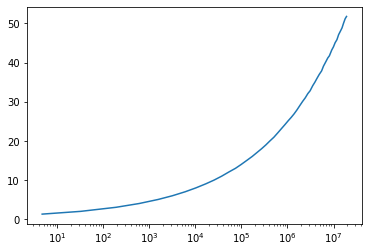

In [72]:
plt.plot(m3_betaList,m3_avgNumbs)
plt.xscale("log")
plt.show()

In [73]:
np.array(m3_avgNumbs[0:-1])<np.array(m3_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [74]:
print(m3_avgNumbs)

[1.3031597616136636, 2.0095775951682873, 3.046305269384166, 4.010636391800765, 5.0497911936409325, 5.993152199671755, 7.011000606241273, 7.993855737063286, 9.038624029274605, 9.997779468470139, 10.999092651330388, 12.063712665372513, 13.004022754385396, 13.97345426045522, 15.05397662893669, 16.02818484265096, 17.031326977104996, 18.002968041591892, 18.988487633138803, 19.948127612775355, 20.94992428513992, 22.025386036298798, 23.159135449280136, 24.131866027235603, 25.163057546419715, 26.021744193837254, 26.899472207149444, 27.896972337118758, 29.125210635341645, 30.106246561970693, 31.00229627457744, 32.0901456243739, 32.813966140518176, 34.10515317956157, 34.99382018913987, 35.94382750713298, 36.972221804067395, 37.88968764883394, 39.091701111904385, 40.094819603684165, 41.20458255750275, 41.746048439504655, 43.2452162953102, 44.020577260230375, 45.061904099911004, 45.86504206687164, 47.15948864486647, 48.05219155205139, 48.89640137176679, 50.05382521687807, 51.21542033673763, 51.798

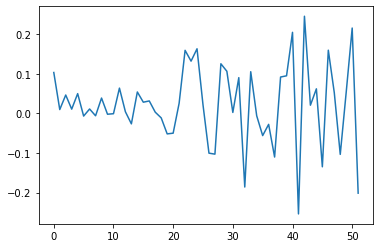

In [75]:
plt.plot(np.array(m3_avgNumbs) - np.array([1.2]+list(range(2,52+1))))

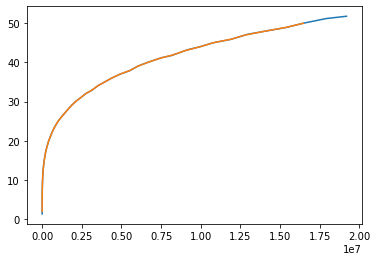

In [76]:
zVals =[ linear_interpolate(m3_betaList,m3_avgNumbs,cnum) for cnum in list(range(2,50+1))]
plt.plot(m3_betaList,m3_avgNumbs)
plt.plot(zVals,list(range(2,50+1)))
plt.xscale("linear")
plt.show()

In [77]:
print(zVals)

[31.774895456757505, 181.1017791809923, 593.3166272461382, 1504.4792442543744, 3166.31977772849, 5941.051024637211, 10202.894108092045, 16523.592721563415, 25433.674585713685, 37157.406076108266, 52193.3241938528, 74025.1697698853, 98935.94346791586, 129906.86626071765, 169736.66178221858, 215573.1150131125, 273064.41493930144, 340148.12798132945, 415618.8392555431, 511460.5916224184, 608600.070301818, 722696.4361615726, 856980.9981954996, 1011806.9488947557, 1202196.2445549064, 1410083.6877459432, 1623172.32615443, 1847345.5701359615, 2106331.9186239555, 2430020.6726351334, 2738806.2012801473, 3164747.609882988, 3496738.0688023563, 3936231.7112589437, 4383618.751981658, 4906135.345138353, 5562759.304010245, 6007118.979906749, 6648234.367655032, 7368026.503044573, 8313235.598992989, 9000612.22451898, 9940866.800296906, 10760084.874523122, 11978644.09607985, 12794486.355606023, 14069402.612325855, 15440782.740466563, 16445539.718811212]


### simulation set using the interpolated beta values obtained above

From interpolation in previous section, the following beta values approximate simulations with mean chr number = 2, 3, 4, ....

In [79]:
m3_betaList =[31.774895456757505, 181.1017791809923, 593.3166272461382, 1504.4792442543744, 3166.31977772849, 5941.051024637211, 10202.894108092045, 16523.592721563415, 25433.674585713685, 37157.406076108266, 52193.3241938528, 74025.1697698853, 98935.94346791586, 129906.86626071765, 169736.66178221858, 215573.1150131125, 273064.41493930144, 340148.12798132945, 415618.8392555431, 511460.5916224184, 608600.070301818, 722696.4361615726, 856980.9981954996, 1011806.9488947557, 1202196.2445549064, 1410083.6877459432, 1623172.32615443, 1847345.5701359615, 2106331.9186239555, 2430020.6726351334, 2738806.2012801473, 3164747.609882988, 3496738.0688023563, 3936231.7112589437, 4383618.751981658, 4906135.345138353, 5562759.304010245, 6007118.979906749, 6648234.367655032, 7368026.503044573, 8313235.598992989, 9000612.22451898, 9940866.800296906, 10760084.874523122, 11978644.09607985, 12794486.355606023, 14069402.612325855, 15440782.740466563, 16445539.718811212]
print(m3_betaList)

[31.774895456757505, 181.1017791809923, 593.3166272461382, 1504.4792442543744, 3166.31977772849, 5941.051024637211, 10202.894108092045, 16523.592721563415, 25433.674585713685, 37157.406076108266, 52193.3241938528, 74025.1697698853, 98935.94346791586, 129906.86626071765, 169736.66178221858, 215573.1150131125, 273064.41493930144, 340148.12798132945, 415618.8392555431, 511460.5916224184, 608600.070301818, 722696.4361615726, 856980.9981954996, 1011806.9488947557, 1202196.2445549064, 1410083.6877459432, 1623172.32615443, 1847345.5701359615, 2106331.9186239555, 2430020.6726351334, 2738806.2012801473, 3164747.609882988, 3496738.0688023563, 3936231.7112589437, 4383618.751981658, 4906135.345138353, 5562759.304010245, 6007118.979906749, 6648234.367655032, 7368026.503044573, 8313235.598992989, 9000612.22451898, 9940866.800296906, 10760084.874523122, 11978644.09607985, 12794486.355606023, 14069402.612325855, 15440782.740466563, 16445539.718811212]


In [80]:
# burnInSteps = 20_000;

# nsamples,jumpsize, alpha =(120_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m3_resListByBeta = p.map(parallel_simulate_pb_pf,jobs)

# m3_chrsByBeta = [x[0][burnInSteps:] for x in m3_resListByBeta]
# m3_timesByBeta = [x[1][burnInSteps:] for x in m3_resListByBeta]

# np.save("./simulation_data/m3_chrsByBeta.npy",m3_chrsByBeta)
# np.save("./simulation_data/m3_timesByBeta.npy",m3_timesByBeta)


In [ ]:
m3_chrsByBeta = np.load("./simulation_data/m3_chrsByBeta.npy")
m3_timesByBeta = np.load("./simulation_data/m3_timesByBeta.npy")

In [81]:
m3_meanListByBeta = []
for ii,beta in enumerate( m3_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m3_chrsByBeta[ii],m3_timesByBeta[ii])
    m3_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

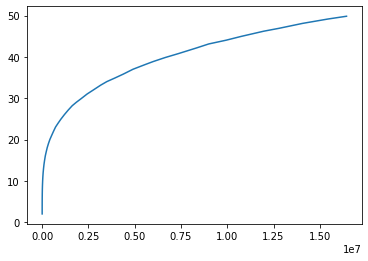

In [82]:
plt.plot(m3_betaList,m3_meanListByBeta)
plt.xscale("linear")
plt.show()

In [83]:
print(m3_meanListByBeta)

[2.0068788451822175, 3.010358219358806, 4.008718176655867, 5.0042253100443235, 5.992701596061537, 7.014743227747267, 8.0154221631416, 8.987759154744316, 9.996704059814075, 10.992352582334846, 11.963428338293463, 13.01501869109776, 14.004576342087368, 14.975134767389372, 16.060671692215873, 16.974203213441225, 18.049336390370133, 19.043496242877204, 20.00909646442577, 20.990042457445902, 21.956317962125453, 23.02959883090208, 23.944298319998047, 24.939951311662018, 26.044897976190818, 27.149789643203565, 28.189949953035516, 29.028990486819744, 29.903261242796795, 31.031745761072752, 31.926899011631306, 33.17872722443739, 34.034043847955715, 34.91237522774367, 35.84277924738343, 37.01420298752206, 38.150596744333946, 38.89440649806881, 39.85579269146903, 40.81423544208702, 42.136634306179786, 43.14097528373144, 44.05001972981718, 44.97395080674223, 46.23331303380708, 46.92175946508779, 48.11537887086381, 49.173803396509186, 49.84599279974945]


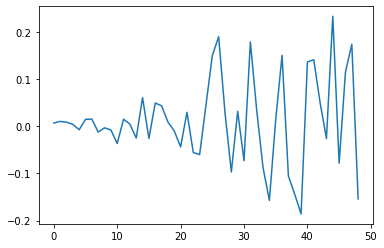

In [84]:
plt.plot(np.array(m3_meanListByBeta) - list(range(2,50+1)))

## m3 with size limit

### finding beta list to get appx uniform sampling across chromosome number

In [33]:
rc, rt = simulate_pb_pf_softLimit(10_000,1,50_000_000,1)
rc = rc[5000:]
rt = rt[5000:]

xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

63.362149791244875

In [59]:
tens = [10**x for x in [0,1,2,3,4,5,6,7]]
allVals = [ [x*power for x in [1,2,3,4,5,6,7,8,9]] for power in tens]
m3_lim_betaList =flatten(allVals)
print(m3_lim_betaList)

[       1        2        3        4        5        6        7        8
        9       10       20       30       40       50       60       70
       80       90      100      200      300      400      500      600
      700      800      900     1000     2000     3000     4000     5000
     6000     7000     8000     9000    10000    20000    30000    40000
    50000    60000    70000    80000    90000   100000   200000   300000
   400000   500000   600000   700000   800000   900000  1000000  2000000
  3000000  4000000  5000000  6000000  7000000  8000000  9000000 10000000
 20000000 30000000 40000000 50000000 60000000 70000000 80000000 90000000]


In [60]:
burnInSteps = 50_000

nsamples,jumpsize, alpha =(100_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m3_lim_resListByBeta = p.map(parallel_simulate_pb_pf_softLimit,jobs)

m3_lim_chrsByBeta = [x[0][burnInSteps:-1] for x in m3_lim_resListByBeta]
m3_lim_timesByBeta = [x[1][burnInSteps:-1] for x in m3_lim_resListByBeta]

In [61]:
m3_lim_avgNumbs = []
for ii,beta in enumerate( m3_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m3_lim_chrsByBeta[ii],m3_lim_timesByBeta[ii])
    m3_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

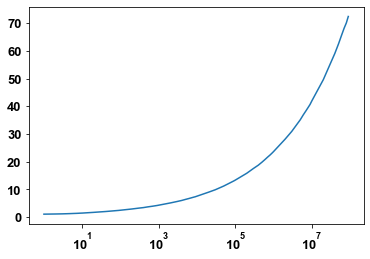

In [62]:
plt.plot(m3_lim_betaList,m3_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [63]:
print(m3_lim_avgNumbs)

[1.0634066710905212, 1.1236997934448902, 1.1715283129871266, 1.2221701029438812, 1.2707484047051576, 1.315270678693089, 1.3475804150226087, 1.3848536741608235, 1.4266370910940758, 1.45259962348666, 1.712371657340891, 1.8865919503003012, 2.005272224901801, 2.114334343243275, 2.2091093301155906, 2.286557847834358, 2.3566362823555638, 2.414864826709505, 2.482688540088404, 2.932909218299451, 3.237464746354493, 3.4364156492407067, 3.657357802192625, 3.8148857306314983, 3.9441033849340776, 4.072623623301656, 4.183201303577261, 4.303270002888758, 5.1030692584408195, 5.621400210535681, 6.014190016322423, 6.384487583412991, 6.671205907099387, 6.928818719094552, 7.155715016483471, 7.341766287789838, 7.557973841502411, 8.987527738495189, 9.868209112220619, 10.620808956601799, 11.211270826971768, 11.766355469704111, 12.232974652946725, 12.641256220565483, 12.995897907146169, 13.344374038205824, 15.829771258332965, 17.573439094869176, 18.740393212004758, 19.83495836576232, 20.7960448768452, 21.6438

In [64]:
np.array(m3_lim_avgNumbs[0:-1])<np.array(m3_lim_avgNumbs[1:])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

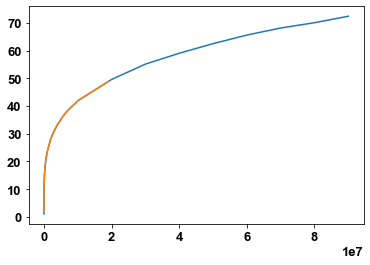

In [66]:
zVals =[ linear_interpolate(m3_lim_betaList,m3_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m3_lim_betaList,m3_lim_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))

In [67]:
print(zVals)

[39.55576232701653, 222.02908025640033, 743.4924614021129, 1871.131089801183, 3963.873766290852, 7313.717243183733, 13092.056615895623, 20141.620589204147, 31751.14157627478, 46421.93954303279, 65007.17798767411, 90117.71517438962, 126379.12187576346, 166614.1391157379, 209762.68175051012, 267113.05428399076, 336553.3570572479, 423717.8012751485, 517172.4014783773, 624057.0808975651, 751468.7491463138, 899146.7693319485, 1081406.3670153941, 1305363.9649924962, 1529321.5629695985, 1753279.1609467003, 1977236.7589238025, 2316330.0130768074, 2668449.779197487, 3024745.1687654075, 3448345.3457997767, 3871945.522834146, 4382834.3977617035, 4931543.84858048, 5490314.677369995, 6064632.735618526, 6781335.347077144, 7561989.116145807, 8415441.795726085, 9282310.850952247, 10126732.787767159, 11426260.713333346, 12725788.638899533, 14025316.56446572, 15324844.490031905, 16624372.415598093, 17923900.34116428, 19223428.266730465]


In [ ]:
#### using these above zAls for now####

### simulation using interpolated beta values above|

In [32]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [69]:
m3_lim_betaList=[39.55576232701653, 222.02908025640033, 743.4924614021129, 1871.131089801183, 3963.873766290852, 7313.717243183733, 13092.056615895623, 20141.620589204147, 31751.14157627478, 46421.93954303279, 65007.17798767411, 90117.71517438962, 126379.12187576346, 166614.1391157379, 209762.68175051012, 267113.05428399076, 336553.3570572479, 423717.8012751485, 517172.4014783773, 624057.0808975651, 751468.7491463138, 899146.7693319485, 1081406.3670153941, 1305363.9649924962, 1529321.5629695985, 1753279.1609467003, 1977236.7589238025, 2316330.0130768074, 2668449.779197487, 3024745.1687654075, 3448345.3457997767, 3871945.522834146, 4382834.3977617035, 4931543.84858048, 5490314.677369995, 6064632.735618526, 6781335.347077144, 7561989.116145807, 8415441.795726085, 9282310.850952247, 10126732.787767159, 11426260.713333346, 12725788.638899533, 14025316.56446572, 15324844.490031905, 16624372.415598093, 17923900.34116428, 19223428.266730465]

In [70]:
# burnInSteps = 50_000;

# nsamples,jumpsize, alpha =(150_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_lim_betaList]

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m3_lim_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m3_lim_resListByBeta = p.map(parallel_simulate_pb_pf_softLimit,jobs)

# m3_lim_chrsByBeta = [x[0][burnInSteps:-1] for x in m3_lim_resListByBeta]
# m3_lim_timesByBeta = [x[1][burnInSteps:-1] for x in m3_lim_resListByBeta]

# np.save("./simulation_data/m3_soft_lim_chrsByBeta.npy",m3_lim_chrsByBeta)
# np.save("./simulation_data/m3_soft_lim_timesByBeta.npy",m3_lim_timesByBeta)


# M4: Equal Break, Short Fuse Big Stick

## m4 EB SFBS no min size

### finding beta list to get appx uniform sampling on chr number

In [9]:

rc, rt = simulate_eb_sfbs(50_00,1,1,1)
rc = rc[20_00:]
rt = rt[20_00:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

1.148056464683449

In [52]:
rc, rt = simulate_eb_sfbs(50_000,1,30_000_000_000,1)
rc = rc[20_000:]
rt = rt[20_000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

56.05629903147034

In [10]:
rc, rt = simulate_eb_sfbs(300_0,1,100000,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

20.146249530315135

In [9]:
rc, rt = simulate_eb_sfbs(300_000,1,1_000_000,1)
rc = rc[200_000:]
rt = rt[200_000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

23.866614290254834

In [108]:
m4_betaList = [0.1,0.5]+list(range(1,10,3))+list(range(10,100,25)) + list(range(100,1000,250)) + list(range(1000,10000,2500))+list(range(10_000,100_000,25_000))+list(range(100_000,1_000_000,250_000)) +list(range(1_000_000,10_000_000,2_500_000,))+list(range(10_000_000,100_000_000,25_000_000))+list(range(100_000_000,1_000_000_000,250_000_000))+list(range(1_000_000_000,30_000_000_000,2_500_000_000))
print(m4_betaList)

[0.1, 0.5, 1, 4, 7, 10, 35, 60, 85, 100, 350, 600, 850, 1000, 3500, 6000, 8500, 10000, 35000, 60000, 85000, 100000, 350000, 600000, 850000, 1000000, 3500000, 6000000, 8500000, 10000000, 35000000, 60000000, 85000000, 100000000, 350000000, 600000000, 850000000, 1000000000, 3500000000, 6000000000, 8500000000, 11000000000, 13500000000, 16000000000, 18500000000, 21000000000, 23500000000, 26000000000, 28500000000]


In [318]:
# m4_betaList = [0.1,0.5]+list(range(1,63,2))
# print(m4_betaList)

[0.1, 0.5, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61]


In [103]:
maxSteps = 300_000


nsamples,jumpsize, alpha =(maxSteps, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-2) as p:
    m4_resListByBeta = p.map(parallel_simulate_eb_sfbs,jobs)


In [104]:
burnInSteps = 50_000;
m4_chrsByBeta = [x[0][burnInSteps:] for x in m4_resListByBeta]
m4_timesByBeta = [x[1][burnInSteps:] for x in m4_resListByBeta]

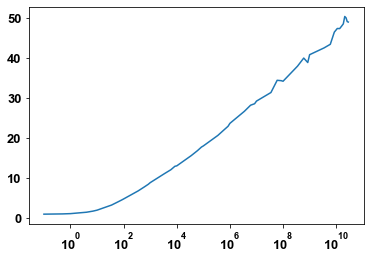

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False False  True  True False
  True  True  True  True  True False  True  True  True False False False]
[1.0165567650735265, 1.0782323060349133, 1.1483263817495664, 1.4990853951729872, 1.774709881920935, 2.0151577076902245, 3.285360767161035, 4.060726195196926, 4.569107485525665, 4.820684906519496, 6.822312267485007, 7.823760024921924, 8.494692894135317, 8.894325083492047, 11.181290946610664, 12.126574868354801, 12.987275491374355, 13.09395559591722, 15.656222630661675, 16.895328571262677, 17.798514069789988, 18.078228044098488, 20.694408885099133, 22.09400314687457, 22.98768460509204, 23.72514426132907, 26.732151472888454, 28.26035185687136, 28.631008516446087, 29.28986221479416, 31.434615868754964, 34.49088352071557, 34.39667259129304, 34.25409127829738, 38.02014434499106, 40.04700049929531, 38.933

In [105]:
m4_avgNumbs = []
for ii,beta in enumerate( m4_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_chrsByBeta[ii],m4_timesByBeta[ii])
    m4_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))
    
plt.plot(m4_betaList,m4_avgNumbs)
plt.xscale("log")
plt.show()

print(np.array(m4_avgNumbs[0:-1])<np.array(m4_avgNumbs[1:]))
print(m4_avgNumbs)

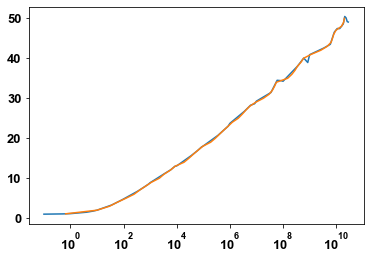

[0.6552748484315651, 9.81088153770912, 29.383560072672132, 58.04201370730593, 122.3961633640451, 247.29453599590664, 394.3577139185381, 665.6697499724156, 1115.5186859280982, 2208.6701143411483, 3301.8215427541986, 5665.246426382513, 8678.915862711761, 18840.261297873883, 28597.245898229306, 41935.9963114127, 62897.284912899806, 95804.92657051473, 188083.7384648217, 283642.8818092012, 404585.66158188117, 583208.8574807167, 852504.9631129929, 1228512.7032738258, 2059904.1247475182, 2891295.5462212106, 3938176.383671394, 5574087.502528936, 9340076.069571462, 18277614.81947356, 29933965.167137716, 39624792.3581099, 47804704.21365777, 55984616.06920563, 149515282.21278313, 215897777.5129574, 282280272.81313163, 348662768.11330587, 470859052.1986613, 594202783.0643659, 1158128777.273487, 2629814651.5356817, 4632579236.524639, 6416311679.010382, 7238189562.51645, 8060067446.022518, 9773724169.747442, 15869656743.525951, 19047888217.44908, 20397041581.573833]


In [106]:
zVals =[ linear_interpolate(m4_betaList,m4_avgNumbs,cnum) for cnum in [1.1]+list(range(2,50+1))]
plt.plot(m4_betaList,m4_avgNumbs)
plt.plot(zVals,[1.1]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

print(zVals)

In [10]:
m4_betaList =[0.6552748484315651, 9.81088153770912, 29.383560072672132, 58.04201370730593, 122.3961633640451, 247.29453599590664, 394.3577139185381, 665.6697499724156, 1115.5186859280982, 2208.6701143411483, 3301.8215427541986, 5665.246426382513, 8678.915862711761, 18840.261297873883, 28597.245898229306, 41935.9963114127, 62897.284912899806, 95804.92657051473, 188083.7384648217, 283642.8818092012, 404585.66158188117, 583208.8574807167, 852504.9631129929, 1228512.7032738258, 2059904.1247475182, 2891295.5462212106, 3938176.383671394, 5574087.502528936, 9340076.069571462, 18277614.81947356, 29933965.167137716, 39624792.3581099, 47804704.21365777, 55984616.06920563, 149515282.21278313, 215897777.5129574, 282280272.81313163, 348662768.11330587, 470859052.1986613, 594202783.0643659, 1158128777.273487, 2629814651.5356817, 4632579236.524639, 6416311679.010382, 7238189562.51645, 8060067446.022518, 9773724169.747442, 15869656743.525951, 19047888217.44908, 20397041581.573833]
print(m4_betaList)

[0.6552748484315651, 9.81088153770912, 29.383560072672132, 58.04201370730593, 122.3961633640451, 247.29453599590664, 394.3577139185381, 665.6697499724156, 1115.5186859280982, 2208.6701143411483, 3301.8215427541986, 5665.246426382513, 8678.915862711761, 18840.261297873883, 28597.245898229306, 41935.9963114127, 62897.284912899806, 95804.92657051473, 188083.7384648217, 283642.8818092012, 404585.66158188117, 583208.8574807167, 852504.9631129929, 1228512.7032738258, 2059904.1247475182, 2891295.5462212106, 3938176.383671394, 5574087.502528936, 9340076.069571462, 18277614.81947356, 29933965.167137716, 39624792.3581099, 47804704.21365777, 55984616.06920563, 149515282.21278313, 215897777.5129574, 282280272.81313163, 348662768.11330587, 470859052.1986613, 594202783.0643659, 1158128777.273487, 2629814651.5356817, 4632579236.524639, 6416311679.010382, 7238189562.51645, 8060067446.022518, 9773724169.747442, 15869656743.525951, 19047888217.44908, 20397041581.573833]


In [11]:
max_steps = 300_000

nsamples,jumpsize, alpha =(max_steps, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m4_resListByBeta = p.map(parallel_simulate_eb_sfbs,jobs)



In [25]:
burnInSteps = 50_000;
m4_chrsByBeta = [x[0][burnInSteps:] for x in m4_resListByBeta]
m4_timesByBeta = [x[1][burnInSteps:] for x in m4_resListByBeta]

In [26]:

m4_avgNumbs = []
for ii,beta in enumerate( m4_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_chrsByBeta[ii],m4_timesByBeta[ii])
    m4_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

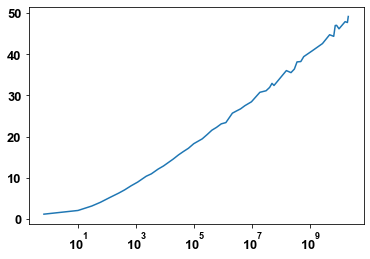

In [27]:
plt.plot(m4_betaList,m4_avgNumbs)
plt.xscale("log")
plt.show()


In [28]:
print(np.array(m4_avgNumbs[0:-1])<np.array(m4_avgNumbs[1:]))
print(m4_avgNumbs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True False  True
  True  True  True  True  True  True False  True  True False  True False
  True]
[1.1013415175039225, 1.9989459956885771, 3.0876080060883795, 3.9866319983216023, 5.155528928437754, 6.220793215972729, 6.999864597157426, 8.013894995059271, 8.905998286640052, 10.3420662631453, 10.911376695716443, 12.073928767462082, 12.835414184971707, 14.522366892110004, 15.53539286161299, 16.34327926743804, 17.14559257002115, 18.25932977476324, 19.438263566923847, 20.54113253374183, 21.547870605243375, 22.231282809072596, 23.093391478720683, 23.401181185600855, 25.695584155091467, 26.25478210609149, 26.73921952158206, 27.52456978382506, 28.46089992887662, 30.77744611109867, 31.15396747175404, 31.967226751224864, 32.95223101483398, 32.43786780450641, 36.06454835048113, 35.568516411948906, 

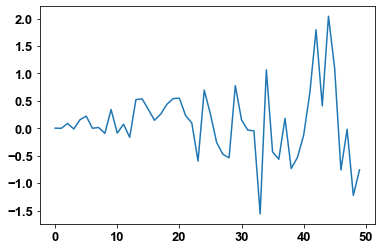

In [29]:
plt.plot(np.array(m4_avgNumbs) - np.array([1.1]+list(range(2,50+1))))

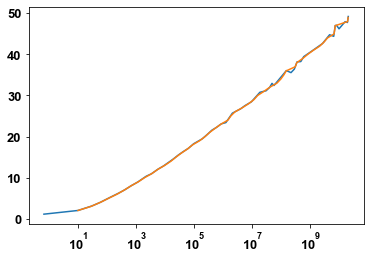

[9.829831117436228, 27.808485968977436, 58.77799509151374, 113.83344779968742, 221.40733252364757, 394.39394204442283, 661.9520316394251, 1187.0738691881334, 1948.2853482389341, 3481.9894059438566, 5514.9520069906175, 9670.29713448862, 15693.788719145768, 23440.596352057168, 36268.223667435304, 59093.52412690757, 88142.49842972639, 153779.48701218012, 236755.9324834459, 338768.15072223276, 522758.5548938889, 823332.351348184, 1445498.4864725925, 1807854.8085873048, 2512496.4877292095, 4481390.927213361, 7486302.727045478, 11419994.791985402, 15278125.840048147, 25167439.33236082, 39896955.93760374, 70481784.49602565, 96271391.53692916, 122060998.57783268, 147850605.6187362, 303762266.82786804, 341826777.5001782, 546345508.4116064, 808707959.0173527, 1265435476.6109324, 2093943418.4437628, 2959127402.7299547, 3891471915.778842, 6600810233.244443, 6912910480.198195, 7225010727.151947, 19253710774.838352, 20174557449.49505]


In [31]:

zVals =[ linear_interpolate(m4_betaList,m4_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m4_betaList,m4_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))
plt.xscale("log")
plt.show()

print(zVals)

### simulations using above interpolated values

In [9]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [13]:
m4_betaList = [9.829831117436228, 27.808485968977436, 58.77799509151374, 113.83344779968742, 221.40733252364757, 394.39394204442283, 661.9520316394251, 1187.0738691881334, 1948.2853482389341, 3481.9894059438566, 5514.9520069906175, 9670.29713448862, 15693.788719145768, 23440.596352057168, 36268.223667435304, 59093.52412690757, 88142.49842972639, 153779.48701218012, 236755.9324834459, 338768.15072223276, 522758.5548938889, 823332.351348184, 1445498.4864725925, 1807854.8085873048, 2512496.4877292095, 4481390.927213361, 7486302.727045478, 11419994.791985402, 15278125.840048147, 25167439.33236082, 39896955.93760374, 70481784.49602565, 96271391.53692916, 122060998.57783268, 147850605.6187362, 303762266.82786804, 341826777.5001782, 546345508.4116064, 808707959.0173527, 1265435476.6109324, 2093943418.4437628, 2959127402.7299547, 3891471915.778842, 6600810233.244443, 6912910480.198195, 7225010727.151947, 19253710774.838352, 20174557449.49505]

In [10]:
# burnInSteps = 200_000;

# nsamples,jumpsize, alpha =(300_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m4_resListByBeta = p.map(parallel_simulate_eb_sfbs,jobs)

# m4_chrsByBeta = [x[0][burnInSteps:] for x in m4_resListByBeta]
# m4_timesByBeta = [x[1][burnInSteps:] for x in m4_resListByBeta]

In [24]:
# np.save("./simulation_data/m4_chrsByBeta.npy",m4_chrsByBeta)
# np.save("./simulation_data/m4_timesByBeta.npy",m4_timesByBeta)

In [7]:
m4_chrsByBeta=np.load("./simulation_data/m4_chrsByBeta.npy")
m4_timesByBeta = np.load("./simulation_data/m4_timesByBeta.npy")

In [25]:
m4_meanListByBeta = []
for ii,beta in enumerate( m4_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_chrsByBeta[ii],m4_timesByBeta[ii])
    m4_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

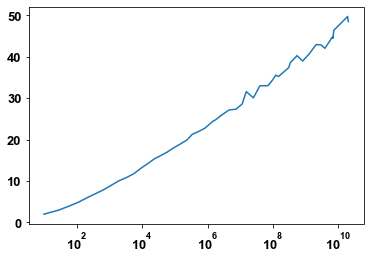

In [26]:
plt.plot(m4_betaList,m4_meanListByBeta)
plt.xscale("log")
plt.show()

In [27]:
print(m4_meanListByBeta)

[2.0113854558570434, 2.9894530753656268, 3.9754962298974643, 4.930783516966956, 6.104990422966513, 7.053622770005605, 7.923587850658426, 9.082169944970577, 10.084463394265429, 10.943965742244929, 11.773665333639066, 13.240823461640602, 14.350528573530884, 15.367933421687074, 16.138545310236214, 17.03411409935996, 17.953009375615668, 19.050432287089176, 19.971984325242325, 21.287414245144454, 21.94114622934805, 22.77012456132365, 24.427291543379557, 24.86840331811803, 25.773275899093484, 27.16206858771682, 27.382320897701547, 28.620125047197906, 31.610762858566787, 30.11052586087049, 33.01978149254137, 33.045580059102605, 34.37107603833795, 35.58401637805788, 35.260200796176335, 37.399813181533, 38.64687222077992, 40.29837255842922, 39.00316289671463, 40.65921020615336, 42.96402377851085, 42.90745348858444, 42.065032799875254, 44.84286914827895, 44.47902166108448, 46.38483980875759, 49.76094889626202, 48.53989122150536]


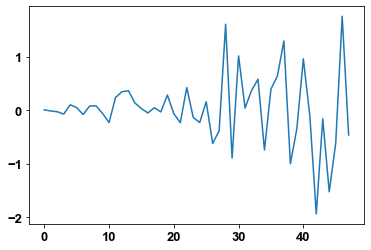

In [17]:
plt.plot(np.array(m4_meanListByBeta) - list(range(2,49+1)))

## m4 with size limit (EB/SFBS)

### finding beta list for appx uniform sampling

In [9]:
rc, rt = simulate_eb_sfbs_softLimit(10_000,1,1,1)
rc = rc[5_000:]
rt = rt[5_000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

1.1359727752713142

In [21]:
rc, rt = simulate_eb_sfbs_softLimit(10_000,1,100_000,1)
rc = rc[5_000:]
rt = rt[5_000:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

55.70114248889234

In [48]:
tens = [10**x for x in [0,1,2,3,4]]
allVals =[ [x*power for x in [1,2,3,4,5,6,7,8,9]] for power in tens] + [[100_000,200_000]]
m4_lim_betaList =flatten(allVals)
m4_lim_betaList = m4_lim_betaList[:]
print(m4_lim_betaList)

[     1      2      3      4      5      6      7      8      9     10
     20     30     40     50     60     70     80     90    100    200
    300    400    500    600    700    800    900   1000   2000   3000
   4000   5000   6000   7000   8000   9000  10000  20000  30000  40000
  50000  60000  70000  80000  90000 100000 200000]


In [49]:

burnInSteps = 50_000

nsamples,jumpsize, alpha =(250_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m4_lim_resListByBeta = p.map(parallel_simulate_eb_sfbs_softLimit,jobs)

m4_lim_chrsByBeta = [x[0][burnInSteps:] for x in m4_lim_resListByBeta]
m4_lim_timesByBeta = [x[1][burnInSteps:] for x in m4_lim_resListByBeta]






In [50]:

m4_lim_avgNumbs = []
for ii,beta in enumerate( m4_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_lim_chrsByBeta[ii],m4_lim_timesByBeta[ii])
    m4_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))
    
    

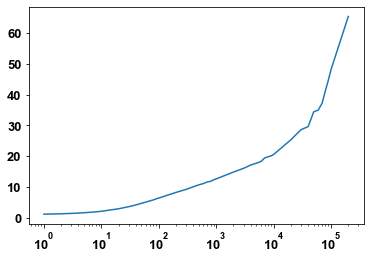

[1.139883058776456, 1.263796649896592, 1.3845691067382828, 1.4934662362209161, 1.5964944733866695, 1.7003632381521263, 1.8063122953150696, 1.8881395866320387, 1.982457491281382, 2.0795529611321806, 2.8877425793965883, 3.5767597691770248, 4.145964709868767, 4.677431414013428, 5.08148916095482, 5.459668465569536, 5.763481765768803, 6.114130099981119, 6.380281953028058, 8.220973860304401, 9.19997079767842, 10.05429500162926, 10.682437194134422, 11.098984731130724, 11.637000002579569, 11.809414453428948, 12.308224659999462, 12.6146613280164, 14.844466961757126, 16.050307021553422, 17.120032699850203, 17.724641233949445, 18.259161590064586, 19.427854511928935, 19.82202395669372, 20.091998147656707, 20.547141966934188, 25.343170604127828, 28.61208218723079, 29.64105515465915, 34.44377144197799, 35.01123721908598, 37.23408168526974, 41.368282155092075, 44.786776748955134, 48.15041777395129, 65.46864556792532]
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  Tru

In [51]:

    
plt.plot(m4_lim_betaList,m4_lim_avgNumbs)
plt.xscale("log")
plt.show()

print(m4_lim_avgNumbs)

print(np.array(m4_lim_avgNumbs[0:-1])<np.array(m4_lim_avgNumbs[1:]))




[1.4851521183439818, 9.180672782629042, 21.629239767431404, 37.43563874039148, 57.98322983356536, 86.74516919529943, 133.66766836547532, 187.99506536477503, 279.5739097800648, 393.64468414002886, 576.2368703835109, 838.2080286370624, 1172.8126730656588, 1621.2822548392046, 2128.983140823127, 2958.2805189256023, 3887.791139087809, 5515.151131103489, 6633.903394189807, 8659.233546256577, 10944.235465055102, 13029.29390746078, 15114.352349866458, 17199.410792272138, 19284.469234677817, 22009.321387789532, 25068.443589714512, 28127.56579163949, 33769.95144720571, 40747.37882453855, 42829.533880502226, 44911.6889364659, 46993.843992429574, 49075.99904839325, 59801.97538707539, 64448.18697824394, 68946.9272869477, 71852.63951354341, 74271.48689963298, 76690.33428572254, 79109.1816718121, 81847.9416233157, 84773.20586622314, 87698.47010913058, 90633.90608409264, 93606.87493709663, 96579.84379010063, 99552.81264310463, 104905.71111637836, 110679.97400226069]


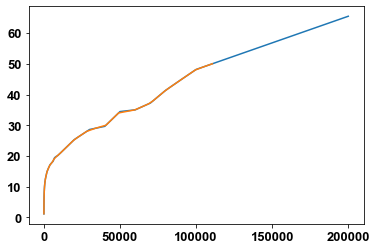

In [52]:
zVals =[ linear_interpolate(m4_lim_betaList,m4_lim_avgNumbs,cnum) for cnum in [1.2]+list(range(2,50+1))]
plt.plot(m4_lim_betaList,m4_lim_avgNumbs)
plt.plot(zVals,[1.2]+list(range(2,50+1)))
print(zVals)

In [54]:
m4_lim_betaList =[1.4851521183439818, 9.180672782629042, 21.629239767431404, 37.43563874039148, 57.98322983356536, 86.74516919529943, 133.66766836547532, 187.99506536477503, 279.5739097800648, 393.64468414002886, 576.2368703835109, 838.2080286370624, 1172.8126730656588, 1621.2822548392046, 2128.983140823127, 2958.2805189256023, 3887.791139087809, 5515.151131103489, 6633.903394189807, 8659.233546256577, 10944.235465055102, 13029.29390746078, 15114.352349866458, 17199.410792272138, 19284.469234677817, 22009.321387789532, 25068.443589714512, 28127.56579163949, 33769.95144720571, 40747.37882453855, 42829.533880502226, 44911.6889364659, 46993.843992429574, 49075.99904839325, 59801.97538707539, 64448.18697824394, 68946.9272869477, 71852.63951354341, 74271.48689963298, 76690.33428572254, 79109.1816718121, 81847.9416233157, 84773.20586622314, 87698.47010913058, 90633.90608409264, 93606.87493709663, 96579.84379010063, 99552.81264310463, 104905.71111637836, 110679.97400226069]

In [55]:
burnInSteps = 50_000

nsamples,jumpsize, alpha =(250_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m4_lim_resListByBeta = p.map(parallel_simulate_eb_sfbs_softLimit,jobs)

m4_lim_chrsByBeta = [x[0][burnInSteps:] for x in m4_lim_resListByBeta]
m4_lim_timesByBeta = [x[1][burnInSteps:] for x in m4_lim_resListByBeta]




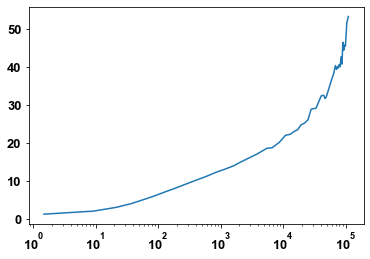

[1.2010435666277128, 1.9972461173126916, 3.016362120091439, 4.003129792329862, 5.023445492198806, 5.996114737386223, 7.166764683349845, 8.051728235512318, 9.154401833851562, 10.087330123543394, 11.101132965588503, 12.229499791791719, 13.071363109498428, 13.973290004505929, 15.015986054443593, 16.168134729222665, 17.12924194494271, 18.604678101859637, 18.7069924230809, 20.12386450359348, 22.021633883184407, 22.28661353987781, 23.05601458974684, 23.503449167075892, 24.74331093372998, 25.23924722406848, 26.10019197176743, 28.910491543866158, 29.190200122223438, 32.41708201602743, 32.531430525384266, 32.57361402311552, 31.723880355686767, 32.091893461186345, 36.69822449791079, 38.259673268463985, 40.426245651653076, 39.41929284044467, 40.14051848624614, 39.7831810966629, 40.66335778314216, 40.11616261299423, 42.75620174771948, 40.81074825692306, 46.574200302522456, 44.47210964174218, 45.84514612690721, 45.527866944213194, 51.72583219395033, 53.38869366606209]
[ True  True  True  True  True

In [56]:

m4_lim_avgNumbs = []
for ii,beta in enumerate( m4_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_lim_chrsByBeta[ii],m4_lim_timesByBeta[ii])
    m4_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))
    
    
    
plt.plot(m4_lim_betaList,m4_lim_avgNumbs)
plt.xscale("log")
plt.show()

print(m4_lim_avgNumbs)

print(np.array(m4_lim_avgNumbs[0:-1])<np.array(m4_lim_avgNumbs[1:]))


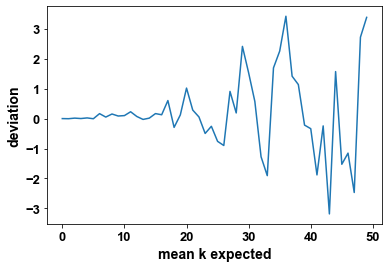

In [57]:
plt.plot(np.array(m4_lim_avgNumbs) - np.array([1.2]+list(range(2,50+1))))
plt.xlabel("mean k expected",**fontLabel)
plt.ylabel("deviation",**fontLabel)
plt.show()
 

[9.21431163532861, 21.429375426751555, 37.38550460278229, 57.51107363059687, 86.90089997750248, 126.98333395528016, 184.81949911700823, 266.7505851434506, 382.9666771296113, 558.0221953774312, 784.9254215287622, 1144.4488907546693, 1634.2876636328576, 2121.199344188543, 2837.2599482609157, 3762.7980494202147, 4848.210073436458, 7052.739426376697, 8482.176974002077, 9714.141119297896, 10918.187271255027, 14962.554151424407, 18034.453483415007, 20694.811184908354, 24712.43992501063, 26047.920206358955, 27136.459745807566, 29933.16371755067, 35520.96683088253, 37683.24844110519, 39845.53005132785, 51190.551643650084, 53519.080846863704, 55847.610050077325, 58176.139253290945, 60699.93173516668, 63675.50908281318, 65985.4251220578, 68061.85715987498, 82827.26722146514, 83935.30543363803, 88813.49774778045, 89322.81680721522, 89832.13586664997, 90341.45492608474, 100824.22648123662, 101687.88064152749, 102551.53480181836]


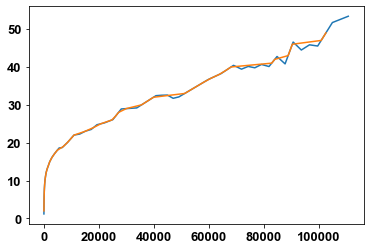

In [58]:
zVals =[ linear_interpolate(m4_lim_betaList,m4_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m4_lim_betaList,m4_lim_avgNumbs)
plt.plot(zVals, list(range(2,49+1)))
print(zVals)

### simulations 

In [84]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [59]:
m4_lim_betaList = [9.21431163532861, 21.429375426751555, 37.38550460278229, 57.51107363059687, 86.90089997750248, 126.98333395528016, 184.81949911700823, 266.7505851434506, 382.9666771296113, 558.0221953774312, 784.9254215287622, 1144.4488907546693, 1634.2876636328576, 2121.199344188543, 2837.2599482609157, 3762.7980494202147, 4848.210073436458, 7052.739426376697, 8482.176974002077, 9714.141119297896, 10918.187271255027, 14962.554151424407, 18034.453483415007, 20694.811184908354, 24712.43992501063, 26047.920206358955, 27136.459745807566, 29933.16371755067, 35520.96683088253, 37683.24844110519, 39845.53005132785, 51190.551643650084, 53519.080846863704, 55847.610050077325, 58176.139253290945, 60699.93173516668, 63675.50908281318, 65985.4251220578, 68061.85715987498, 82827.26722146514, 83935.30543363803, 88813.49774778045, 89322.81680721522, 89832.13586664997, 90341.45492608474, 100824.22648123662, 101687.88064152749, 102551.53480181836]

In [60]:
# burnInSteps = 100_000;

# nsamples,jumpsize, alpha =(200_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m4_lim_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m4_lim_resListByBeta = p.map(parallel_simulate_eb_sfbs_softLimit,jobs)

# m4_lim_chrsByBeta = [x[0][burnInSteps:] for x in m4_lim_resListByBeta]
# m4_lim_timesByBeta = [x[1][burnInSteps:] for x in m4_lim_resListByBeta]

In [61]:
# np.save("./simulation_data/m4_soft_lim_chrsByBeta.npy",m4_lim_chrsByBeta)
# np.save("./simulation_data/m4_soft_lim_timesByBeta.npy",m4_lim_timesByBeta)

In [7]:
# m4_lim_chrsByBeta=np.load("./simulation_data/m4_soft_lim_chrsByBeta.npy")
# m4_lim_timesByBeta = np.load("./simulation_data/m4_soft_lim_timesByBeta.npy")

In [62]:
m4_lim_meanListByBeta = []
for ii,beta in enumerate( m4_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m4_lim_chrsByBeta[ii],m4_lim_timesByBeta[ii])
    m4_lim_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

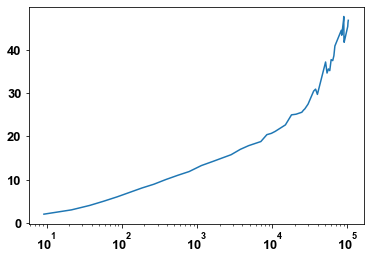

In [63]:
plt.plot(m4_lim_betaList,m4_lim_meanListByBeta)
plt.xscale("log")
plt.show()

In [64]:
print(m4_lim_meanListByBeta)

[2.0057853956444047, 2.9962195069109088, 4.020070297083936, 4.99934230861159, 6.007543018090998, 7.02899146062443, 8.040727436494828, 8.914119990978989, 9.983261001191407, 10.991512813787814, 11.837698248323788, 13.230126598070017, 14.194376912059623, 14.921962361020501, 15.728309809667696, 16.965573770124124, 17.817269755382938, 18.765051960810077, 20.359275325418285, 20.652581871046124, 21.102550072651802, 22.611481542270447, 24.933215395963398, 25.075058619898194, 25.527274069998157, 26.020232885611666, 26.31716074572713, 27.406676342503285, 30.41864972925884, 30.869137486008277, 29.65267455686469, 37.13312866688965, 34.58340252122351, 35.539392922339474, 35.14277252123695, 37.677773822413805, 37.45037314969356, 38.56751402130706, 40.82684748692426, 44.45134237300777, 43.31669125598404, 46.864629214347886, 47.63898326524481, 42.34005226650066, 41.68126227693246, 45.32420122680385, 46.27038011005088, 46.751004736358084]


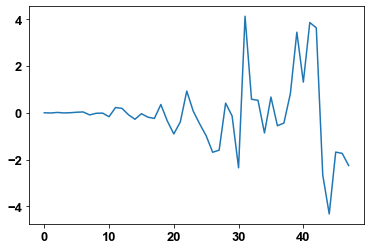

In [65]:
plt.plot(np.array(m4_lim_meanListByBeta) - list(range(2,49+1)))

# M5: Proportional Break, Short Fuse Big Stick

## m5 PB SFBS no min size

### finding beta list to get appx uniform sampling on chr number

In [24]:
rc, rt = simulate_pb_sfbs(30_000,1,100,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

4.690002054471587

In [10]:
rc, rt = simulate_pb_sfbs(30_000,1,20_000,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

29.901363380415766

In [13]:
rc, rt = simulate_pb_sfbs(30_000,1,200_000,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

57.02587747076741

In [30]:
m5_betaList = [0.1,0.5]+list(range(1,10,5))+list(range(10,100,25)) + list(range(100,1000,250)) +  list(range(1000,10000,2500))+list(range(10_000,200_000,20_000))
print(m5_betaList)

[0.1, 0.5, 1, 6, 10, 35, 60, 85, 100, 350, 600, 850, 1000, 3500, 6000, 8500, 10000, 30000, 50000, 70000, 90000, 110000, 130000, 150000, 170000, 190000]


In [318]:
# m4_betaList = [0.1,0.5]+list(range(1,63,2))
# print(m4_betaList)

[0.1, 0.5, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49, 51, 53, 55, 57, 59, 61]


In [31]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-2) as p:
    m5_resListByBeta = p.map(parallel_simulate_pb_sfbs,jobs)

m5_chrsByBeta = [x[0][burnInSteps:] for x in m5_resListByBeta]
m5_timesByBeta = [x[1][burnInSteps:] for x in m5_resListByBeta]

In [32]:
m5_avgNumbs = []
for ii,beta in enumerate( m5_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_chrsByBeta[ii],m5_timesByBeta[ii])
    m5_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

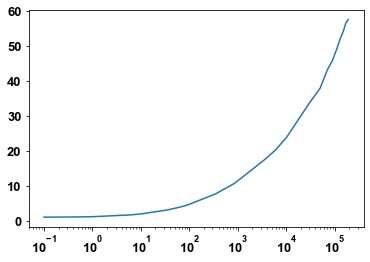

In [33]:
plt.plot(m5_betaList,m5_avgNumbs)
plt.xscale("log")
plt.show()

In [34]:
print(np.array(m5_avgNumbs[0:-1])<np.array(m5_avgNumbs[1:]))
print(m5_avgNumbs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1.0165180374966993, 1.079593254246458, 1.1489307759730418, 1.656625932945985, 1.94004740241906, 3.0718277009750263, 3.804862972468772, 4.364730348413654, 4.703021423375663, 7.704731581643963, 9.516648418910512, 10.690270115000786, 11.44608460818498, 17.406595565707413, 20.253761323930497, 22.680063193934085, 23.757887427837897, 33.743237631296275, 37.99866899792743, 43.184341680041115, 46.01087058695653, 49.21797909041199, 52.22398293950914, 54.305012374797606, 56.74470985995967, 57.67289729938149]


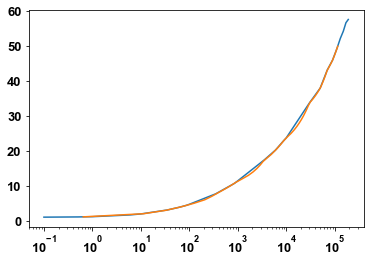

[0.6471551423052827, 11.32429848923491, 33.41339125034534, 68.71353805898661, 124.73411496828737, 208.01997096986287, 291.30582697143836, 390.739786214675, 528.7152135952987, 702.9615383516882, 911.4694255916575, 1232.3271426571046, 1651.7542719445505, 2071.1814012319965, 2490.608530519443, 2910.0356598068884, 3329.4627890943348, 4021.0483729114976, 4899.114566556735, 5777.180760201973, 6768.905433094769, 7799.280107782837, 8945.253682375173, 10484.9355650606, 12487.869822997101, 14490.804080933603, 16493.738338870106, 18496.672596806606, 20499.606854743106, 22502.54111267961, 24505.475370616114, 26508.409628552614, 28511.343886489114, 31206.751309477673, 35906.62736830203, 40606.50342712639, 45306.37948595075, 50005.13338251047, 53861.91363572305, 57718.69388893564, 61575.474142148225, 65432.25439536081, 69289.0346485734, 75771.44863414124, 82847.26517755879, 89923.08172097633, 96168.35639940306, 102404.50337679757, 108640.65035419208, 115203.0599350223]


In [35]:
zVals =[ linear_interpolate(m5_betaList,m5_avgNumbs,cnum) for cnum in [1.1]+list(range(2,50+1))]
plt.plot(m5_betaList,m5_avgNumbs)
plt.plot(zVals,[1.1]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

print(zVals)

In [36]:
m5_betaList = [0.6471551423052827, 11.32429848923491, 33.41339125034534, 68.71353805898661, 124.73411496828737, 208.01997096986287, 291.30582697143836, 390.739786214675, 528.7152135952987, 702.9615383516882, 911.4694255916575, 1232.3271426571046, 1651.7542719445505, 2071.1814012319965, 2490.608530519443, 2910.0356598068884, 3329.4627890943348, 4021.0483729114976, 4899.114566556735, 5777.180760201973, 6768.905433094769, 7799.280107782837, 8945.253682375173, 10484.9355650606, 12487.869822997101, 14490.804080933603, 16493.738338870106, 18496.672596806606, 20499.606854743106, 22502.54111267961, 24505.475370616114, 26508.409628552614, 28511.343886489114, 31206.751309477673, 35906.62736830203, 40606.50342712639, 45306.37948595075, 50005.13338251047, 53861.91363572305, 57718.69388893564, 61575.474142148225, 65432.25439536081, 69289.0346485734, 75771.44863414124, 82847.26517755879, 89923.08172097633, 96168.35639940306, 102404.50337679757, 108640.65035419208, 115203.0599350223]
print(m5_betaList)

[0.6471551423052827, 11.32429848923491, 33.41339125034534, 68.71353805898661, 124.73411496828737, 208.01997096986287, 291.30582697143836, 390.739786214675, 528.7152135952987, 702.9615383516882, 911.4694255916575, 1232.3271426571046, 1651.7542719445505, 2071.1814012319965, 2490.608530519443, 2910.0356598068884, 3329.4627890943348, 4021.0483729114976, 4899.114566556735, 5777.180760201973, 6768.905433094769, 7799.280107782837, 8945.253682375173, 10484.9355650606, 12487.869822997101, 14490.804080933603, 16493.738338870106, 18496.672596806606, 20499.606854743106, 22502.54111267961, 24505.475370616114, 26508.409628552614, 28511.343886489114, 31206.751309477673, 35906.62736830203, 40606.50342712639, 45306.37948595075, 50005.13338251047, 53861.91363572305, 57718.69388893564, 61575.474142148225, 65432.25439536081, 69289.0346485734, 75771.44863414124, 82847.26517755879, 89923.08172097633, 96168.35639940306, 102404.50337679757, 108640.65035419208, 115203.0599350223]


In [37]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
    m5_resListByBeta = p.map(parallel_simulate_pb_sfbs,jobs)

m5_chrsByBeta = [x[0][burnInSteps:] for x in m5_resListByBeta]
m5_timesByBeta = [x[1][burnInSteps:] for x in m5_resListByBeta]

In [38]:
m5_avgNumbs = []
for ii,beta in enumerate( m5_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_chrsByBeta[ii],m5_timesByBeta[ii])
    m5_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

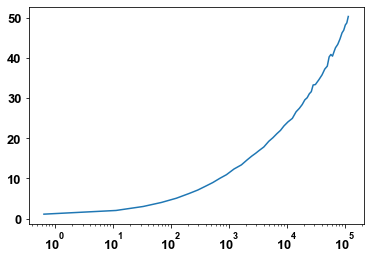

In [39]:
plt.plot(m5_betaList,m5_avgNumbs)
plt.xscale("log")
plt.show()


In [40]:
print(np.array(m5_avgNumbs[0:-1])<np.array(m5_avgNumbs[1:]))
print(m5_avgNumbs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True]
[1.1013735363379071, 2.021625211646718, 3.0170658659510377, 4.0180732797359955, 5.0786565702182545, 6.271650793107581, 7.11448510756248, 8.023458653480866, 8.977666091767794, 10.051365674171326, 10.948092737383446, 12.372492305291475, 13.402176467507518, 14.63921537008765, 15.587629478942153, 16.29483007913188, 16.968163071332725, 17.861099692369297, 19.281858263376407, 20.178403349227274, 21.190933431433038, 22.006290625907255, 23.111742363311468, 24.117064236020017, 24.997671068422388, 26.64373332043613, 27.50507772159872, 28.45966286891633, 29.61779572566782, 30.150836860269255, 31.135939841482745, 31.663682846176506, 33.32994023452998, 33.439932968020926, 34.66517271259421, 35.8496518884

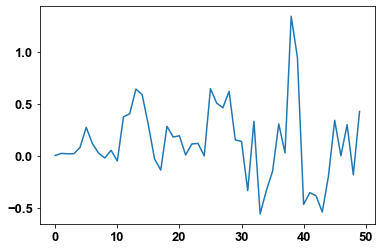

In [41]:
plt.plot(np.array(m5_avgNumbs) - np.array([1.1]+list(range(2,50+1))))

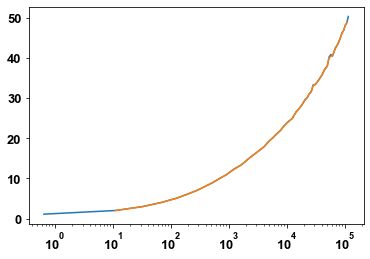

[11.07339377386754, 33.03469514785935, 68.07619070350405, 120.57943284112515, 189.0553620862785, 279.9928203469509, 388.17360944903453, 532.3396924445842, 694.625612651734, 923.1619633861786, 1148.4201874789314, 1487.933435008873, 1854.4507332529365, 2230.734976197197, 2735.1775874513223, 3354.12071036286, 4106.892419117736, 4724.918740805042, 5602.454522490362, 6581.89529071981, 7791.330583737794, 8829.415250732622, 10305.648027204867, 12490.703675019091, 13707.507143713045, 15319.25172219837, 17532.196552065085, 19431.15929612908, 21935.762499958157, 24229.07932805329, 26912.68159375627, 28114.737333725545, 33355.10280280276, 37235.18322981453, 41092.40325921164, 44324.235219508904, 49835.2146862185, 51629.012272836495, 53296.43985278771, 63200.40909515579, 66846.81779279489, 72250.90028189064, 78620.65733092753, 83752.65727085368, 88359.07722351252, 96176.92849789288, 100976.14557506789, 109390.33738142597]


In [42]:

zVals =[ linear_interpolate(m5_betaList,m5_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m5_betaList,m5_avgNumbs)
plt.plot(zVals,list(range(2,49+1)))
plt.xscale("log")
plt.show()

print(zVals)

### simulations using above interpolated values

In [44]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [45]:
m5_betaList =[11.07339377386754, 33.03469514785935, 68.07619070350405, 120.57943284112515, 189.0553620862785, 279.9928203469509, 388.17360944903453, 532.3396924445842, 694.625612651734, 923.1619633861786, 1148.4201874789314, 1487.933435008873, 1854.4507332529365, 2230.734976197197, 2735.1775874513223, 3354.12071036286, 4106.892419117736, 4724.918740805042, 5602.454522490362, 6581.89529071981, 7791.330583737794, 8829.415250732622, 10305.648027204867, 12490.703675019091, 13707.507143713045, 15319.25172219837, 17532.196552065085, 19431.15929612908, 21935.762499958157, 24229.07932805329, 26912.68159375627, 28114.737333725545, 33355.10280280276, 37235.18322981453, 41092.40325921164, 44324.235219508904, 49835.2146862185, 51629.012272836495, 53296.43985278771, 63200.40909515579, 66846.81779279489, 72250.90028189064, 78620.65733092753, 83752.65727085368, 88359.07722351252, 96176.92849789288, 100976.14557506789, 109390.33738142597]

In [46]:
# burnInSteps = 50_000;

# nsamples,jumpsize, alpha =(150_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m5_resListByBeta = p.map(parallel_simulate_pb_sfbs,jobs)

# m5_chrsByBeta = [x[0][burnInSteps:] for x in m5_resListByBeta]
# m5_timesByBeta = [x[1][burnInSteps:] for x in m5_resListByBeta]

In [47]:
# np.save("./simulation_data/m5_chrsByBeta.npy",m5_chrsByBeta)
# np.save("./simulation_data/m5_timesByBeta.npy",m5_timesByBeta)

In [ ]:
m5_chrsByBeta=np.load("./simulation_data/m5_chrsByBeta.npy")
m5_timesByBeta = np.load("./simulation_data/m5_timesByBeta.npy")

In [48]:
m5_meanListByBeta = []
for ii,beta in enumerate( m5_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_chrsByBeta[ii],m5_timesByBeta[ii])
    m5_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

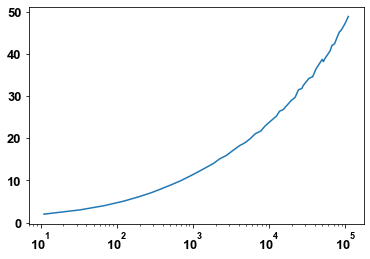

In [49]:
plt.plot(m5_betaList,m5_meanListByBeta)
plt.xscale("log")
plt.show()

In [50]:
print(m5_meanListByBeta)

[1.9993003755178327, 3.016667388120768, 4.006673203461052, 5.039500557805443, 6.048378855694977, 7.044398727192649, 8.040111010366896, 9.04733077172617, 9.94965119193231, 11.064088960535583, 11.955324830276716, 13.06336748623287, 14.013666764010061, 15.098591575737554, 15.911284388538533, 17.110084866244467, 18.267411093648466, 18.842794483346665, 19.848642419262873, 21.075769035513012, 21.735855860627023, 22.89403155627779, 23.975389342817486, 25.26662933763225, 26.427207001401793, 26.819027334042993, 28.0219803443156, 28.94371906127928, 29.712264810533462, 31.49863058258078, 31.823241829920768, 32.549162854221564, 34.21560355088193, 34.58280354982371, 36.39123177777791, 37.35066473993729, 38.72123485528134, 38.189558424174706, 38.7510304137054, 40.74969834390767, 42.02053485380299, 42.42170186430104, 44.10328135762695, 45.23408232577802, 45.66138332542373, 46.786773670833895, 47.512600787511865, 48.89565415736914]


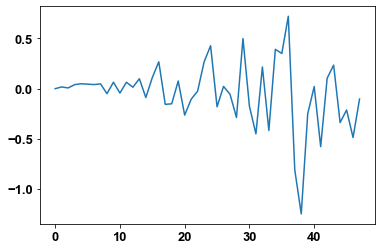

In [51]:
plt.plot(np.array(m5_meanListByBeta) - list(range(2,49+1)))

## m5 PB SFBS WITH min size

### finding beta list to get appx uniform sampling on chr number

In [20]:
rc, rt = simulate_pb_sfbs_softLimit(10_000,1,40_000,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

52.28576896414703

In [9]:
rc, rt = simulate_pb_sfbs_softLimit(10_000,1,0.1,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

1.0153974391450067

In [35]:
rc, rt = simulate_pb_sfbs_softLimit(30_000,1,12_000,1)
rc = rc[200_0:]
rt = rt[200_0:]
xvals,yvals = get_prob_observing_n_chrs(rc,rt)
sum([a*b for a,b in list(zip(xvals,yvals))])

54.42434647653871

In [31]:
tens = [10**x for x in [0,1,2,3,4]]
allVals =[ [x*power for x in [1,2,3,4,5,6,7,8,9]] for power in tens]
m5_lim_betaList =flatten(allVals)
m5_lim_betaList = m5_lim_betaList[0:-5]
print(m5_lim_betaList)

[    1     2     3     4     5     6     7     8     9    10    20    30
    40    50    60    70    80    90   100   200   300   400   500   600
   700   800   900  1000  2000  3000  4000  5000  6000  7000  8000  9000
 10000 20000 30000 40000]


In [32]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-2) as p:
    m5_lim_resListByBeta = p.map(parallel_simulate_pb_sfbs_softLimit,jobs)

m5_lim_chrsByBeta = [x[0][burnInSteps:] for x in m5_lim_resListByBeta]
m5_lim_timesByBeta = [x[1][burnInSteps:] for x in m5_lim_resListByBeta]

In [33]:
m5_lim_avgNumbs = []
for ii,beta in enumerate( m5_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_lim_chrsByBeta[ii],m5_lim_timesByBeta[ii])
    m5_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

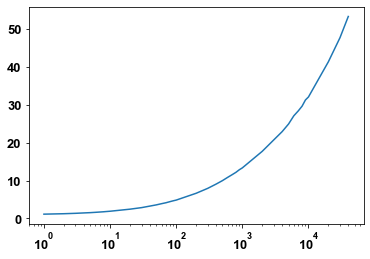

In [34]:
plt.plot(m5_lim_betaList,m5_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [35]:
print(np.array(m5_lim_avgNumbs[0:-1])<np.array(m5_lim_avgNumbs[1:]))
print(m5_lim_avgNumbs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True]
[1.1358069555538697, 1.251668539741375, 1.3563700118710067, 1.4579582706413656, 1.5325043725695668, 1.6182342403383794, 1.6957059036815747, 1.7675585369835989, 1.8439186624071424, 1.9058368987938532, 2.4507990240309003, 2.8611897084288747, 3.26645334006569, 3.581950095571237, 3.898222355681423, 4.1470644085641135, 4.424742152769159, 4.659366747514698, 4.846636055220663, 6.643573530958459, 7.948650891499792, 9.058659892058314, 9.982605108372564, 10.846487900950661, 11.54749910988114, 12.17315851659575, 12.853173150657705, 13.347001979844245, 17.71900952613494, 20.76548793227204, 22.919380298260577, 24.929090960804036, 27.086912983460625, 28.373628055137253, 29.62789268711884, 31.27038872369429, 32.06551811193675, 41.3534042746368, 47.73007913631041, 53

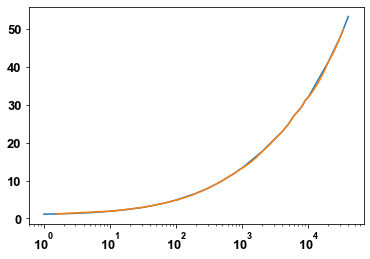

[1.5540494279988706, 11.727883404102402, 33.425185008841915, 64.0900500192609, 108.53474018156186, 164.18497918553246, 227.31075412216933, 304.6260083003265, 394.71536789081904, 502.013570796511, 621.8986653984534, 772.3238371009204, 929.7323365231948, 1149.3588501945228, 1378.08672621304, 1606.8146022315573, 1835.5424782500745, 2092.234520126257, 2420.4823744309224, 2748.7302287355874, 3108.878266821067, 3573.15401977451, 4040.1150788727923, 4537.69914340396, 5032.861393781061, 5496.291644052053, 5959.721894323044, 6709.626425180204, 7499.393771371161, 8226.54990002715, 8835.379375247661, 9917.600691276715, 11006.129782055374, 12082.80103155451, 13159.472281053646, 14236.143530552781, 15312.814780051916, 16389.48602955105, 17466.15727905019, 18542.828528549326, 19619.49977804846, 21014.00140259542, 22582.21684668275, 24150.432290770084, 25718.64773485741, 27286.863178944746, 28855.078623032077, 30483.936289492616, 32276.818406412425, 34069.70052333223]


In [37]:
zVals =[ linear_interpolate(m5_lim_betaList,m5_lim_avgNumbs,cnum) for cnum in [1.2]+list(range(2,50+1))]
plt.plot(m5_lim_betaList,m5_lim_avgNumbs)
plt.plot(zVals,[1.2]+list(range(2,50+1)))
plt.xscale("log")
plt.show()

print(zVals)

In [38]:
m5_lim_betaList =[1.5540494279988706, 11.727883404102402, 33.425185008841915, 64.0900500192609, 108.53474018156186, 164.18497918553246, 227.31075412216933, 304.6260083003265, 394.71536789081904, 502.013570796511, 621.8986653984534, 772.3238371009204, 929.7323365231948, 1149.3588501945228, 1378.08672621304, 1606.8146022315573, 1835.5424782500745, 2092.234520126257, 2420.4823744309224, 2748.7302287355874, 3108.878266821067, 3573.15401977451, 4040.1150788727923, 4537.69914340396, 5032.861393781061, 5496.291644052053, 5959.721894323044, 6709.626425180204, 7499.393771371161, 8226.54990002715, 8835.379375247661, 9917.600691276715, 11006.129782055374, 12082.80103155451, 13159.472281053646, 14236.143530552781, 15312.814780051916, 16389.48602955105, 17466.15727905019, 18542.828528549326, 19619.49977804846, 21014.00140259542, 22582.21684668275, 24150.432290770084, 25718.64773485741, 27286.863178944746, 28855.078623032077, 30483.936289492616, 32276.818406412425, 34069.70052333223]

In [39]:
burnInSteps = 50_000;

nsamples,jumpsize, alpha =(150_000, 1, 1)

jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_lim_betaList]

with multiprocessing.Pool(multiprocessing.cpu_count()-2) as p:
    m5_lim_resListByBeta = p.map(parallel_simulate_pb_sfbs_softLimit,jobs)

m5_lim_chrsByBeta = [x[0][burnInSteps:] for x in m5_lim_resListByBeta]
m5_lim_timesByBeta = [x[1][burnInSteps:] for x in m5_lim_resListByBeta]

In [40]:
m5_lim_avgNumbs = []
for ii,beta in enumerate( m5_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_lim_chrsByBeta[ii],m5_lim_timesByBeta[ii])
    m5_lim_avgNumbs.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

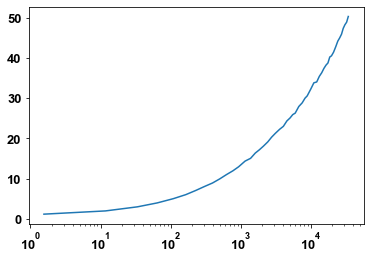

In [41]:
plt.plot(m5_lim_betaList,m5_lim_avgNumbs)
plt.xscale("log")
plt.show()

In [42]:
print(np.array(m5_lim_avgNumbs[0:-1])<np.array(m5_lim_avgNumbs[1:]))
print(m5_lim_avgNumbs)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True]
[1.205361075859533, 2.009299629342411, 3.0207229605471486, 3.9934477422324592, 5.042591494724004, 6.051350806009618, 7.084377208036988, 8.08977631637166, 8.94071793742512, 9.97753954694712, 11.010633963507535, 11.977026955391267, 12.966827341988525, 14.372760531057434, 15.067289909472466, 16.368858405810087, 17.17647711492639, 18.061787012430838, 19.136787137825397, 20.319006736845513, 21.275131213720176, 22.266546557856447, 23.00008322976054, 24.347176589235904, 25.082322688322623, 25.911762965337864, 26.281115989857902, 27.927824604390633, 28.83186725273228, 29.992654123707723, 30.5571970380671, 32.22042058014862, 33.809861037155876, 34.018248848116336, 35.404665081274516, 36.3001352834500

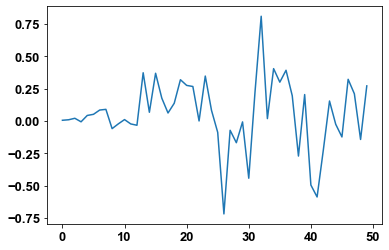

In [43]:
plt.plot(np.array(m5_lim_avgNumbs) - np.array([1.2]+list(range(2,50+1))))

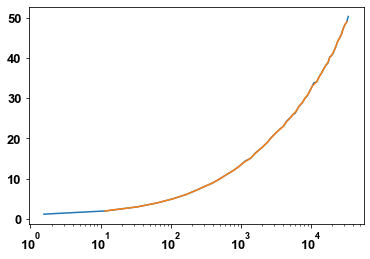

[11.61019669215271, 32.980630971711854, 64.36762214953409, 106.73044426685794, 161.35210855374635, 222.1546645644665, 297.7222039683825, 400.85032757955463, 504.61998652762287, 620.6646506746696, 775.9772530098122, 934.9143716902403, 1091.1284189713756, 1355.9262841216787, 1541.994195199646, 1785.5619178601892, 2074.3196245320605, 2378.7148588493, 2660.156771684914, 3005.2432598381974, 3448.331356318798, 4040.062095758765, 4409.46041580059, 4977.412432469067, 5607.003370617122, 6287.098803394049, 6772.678506578415, 7604.717806868524, 8234.47203649243, 9123.501081127832, 9774.17808794476, 10451.49604629894, 11988.515238096737, 12845.215098928751, 13875.274983653217, 14926.233276412944, 16127.759961727836, 17664.136174843832, 18393.808336861555, 20380.754376646684, 21691.075709394237, 22839.263092767033, 23975.164193575874, 25763.22540654768, 27421.005506429112, 28505.687126835826, 30098.245841244807, 32458.150547499372]


In [44]:
zVals =[ linear_interpolate(m5_lim_betaList,m5_lim_avgNumbs,cnum) for cnum in list(range(2,49+1))]
plt.plot(m5_lim_betaList,m5_lim_avgNumbs)
plt.plot(zVals, list(range(2,49+1)))
plt.xscale("log")
plt.show()

print(zVals)

### simulations using above interpolated values

In [46]:
print(list(range(2,49+1)))

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [47]:
m5_lim_betaList =[11.61019669215271, 32.980630971711854, 64.36762214953409, 106.73044426685794, 161.35210855374635, 222.1546645644665, 297.7222039683825, 400.85032757955463, 504.61998652762287, 620.6646506746696, 775.9772530098122, 934.9143716902403, 1091.1284189713756, 1355.9262841216787, 1541.994195199646, 1785.5619178601892, 2074.3196245320605, 2378.7148588493, 2660.156771684914, 3005.2432598381974, 3448.331356318798, 4040.062095758765, 4409.46041580059, 4977.412432469067, 5607.003370617122, 6287.098803394049, 6772.678506578415, 7604.717806868524, 8234.47203649243, 9123.501081127832, 9774.17808794476, 10451.49604629894, 11988.515238096737, 12845.215098928751, 13875.274983653217, 14926.233276412944, 16127.759961727836, 17664.136174843832, 18393.808336861555, 20380.754376646684, 21691.075709394237, 22839.263092767033, 23975.164193575874, 25763.22540654768, 27421.005506429112, 28505.687126835826, 30098.245841244807, 32458.150547499372]

In [48]:
# burnInSteps = 50_000;

# nsamples,jumpsize, alpha =(150_000, 1, 1)

# jobs = [(nsamples,jumpsize,beta,alpha) for beta in m5_lim_betaList]

# with multiprocessing.Pool(multiprocessing.cpu_count()-1) as p:
#     m5_lim_resListByBeta = p.map(parallel_simulate_pb_sfbs_softLimit,jobs)

# m5_lim_chrsByBeta = [x[0][burnInSteps:] for x in m5_lim_resListByBeta]
# m5_lim_timesByBeta = [x[1][burnInSteps:] for x in m5_lim_resListByBeta]

In [49]:
# np.save("./simulation_data/m5_soft_lim_chrsByBeta.npy",m5_lim_chrsByBeta)
# np.save("./simulation_data/m5_soft_lim_timesByBeta.npy",m5_lim_timesByBeta)

In [ ]:
m5_lim_chrsByBeta=np.load("./simulation_data/m5_soft_lim_chrsByBeta.npy")
m5_lim_timesByBeta = np.load("./simulation_data/m5_soft_lim_timesByBeta.npy")

In [50]:
m5_lim_meanListByBeta = []
for ii,beta in enumerate( m5_lim_betaList):
    xvals,yvals = get_prob_observing_n_chrs(m5_lim_chrsByBeta[ii],m5_lim_timesByBeta[ii])
    m5_lim_meanListByBeta.append(np.sum([a*b for a,b in list(zip(xvals,yvals))]))

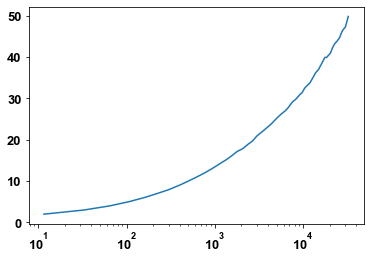

In [51]:
plt.plot(m5_lim_betaList,m5_lim_meanListByBeta)
plt.xscale("log")
plt.show()

In [52]:
print(m5_lim_meanListByBeta)

[1.9973421360846688, 2.9996511379547752, 3.996459372725252, 5.015231141080426, 6.050650658838856, 6.9907206305363365, 7.892929117715402, 9.030967406984804, 10.038153263073813, 10.966831608624474, 12.043393082465581, 13.042667554265446, 13.9517923940888, 15.212461174228785, 16.081593229319097, 17.15469611642182, 17.855545447918796, 18.918475933575422, 19.668485376674944, 20.944711368829726, 21.98581812162928, 23.22575461970329, 23.94905644683764, 25.13308832914588, 26.176568397828685, 27.03947147328921, 27.77521241107151, 29.216683051449877, 29.77980693559652, 30.86696495755389, 31.470640646182165, 32.554981014447606, 33.8319634365862, 34.96240750764914, 36.24942762413944, 37.00509950840322, 38.35442524731067, 39.96878921647172, 39.90546225562341, 40.98398107558382, 42.450620208584155, 43.2831334819566, 43.770121897130174, 44.640349004008335, 46.11377100034137, 46.7129289336502, 47.29241562754239, 49.84960508255823]


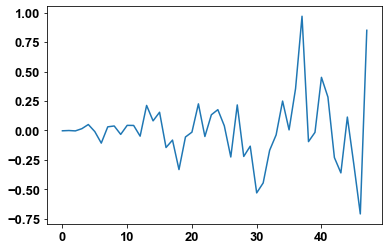

In [53]:
plt.plot(np.array(m5_lim_meanListByBeta) - list(range(2,49+1)))